# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, f1_score, roc_auc_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# 1. Подготовка данных

**Подготовьте данные**  
1.1. Откройте файлы и изучите их.  
1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.  
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?  
1.4. Проведите предобработку данных.

#### 1.1. Откройте файлы и изучите их.

Из описания проекта: *Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.*

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')

print(df_train.shape)
print(df_test.shape)
df_train.head()

(16860, 87)
(5856, 53)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Конечной нашей целью по условиям проекта - нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.  
И вычислить итоговую sMAPE = 25% * sMAPE(rougher) + 75% * sMAPE(final).

Т.е. мы должны обучить 2 некие модели:  
$model1.fit(train-for-recovery, target-for-recovery)$ и  
$model2.fit(train-for-finalrecovery, target-for-finalrecovery)$

Затем получить два массива предсказанных значений:  
$predict-for-recovery=model.predict(valid-for-recovery)$  
$predict-for-finalrecovery=model.predict(valid-for-finalrecovery)$  

А затем нужно получить оценки sMAPE:  
$sMAPE(rougher)=smape(recovery-valid,predict-for-recovery)$  
$sMAPE(final)=smape(finalrecovery-valid,predict-for-finalrecovery)$  

Находим лучшую модель и по ней предсказываем `rougher.output.recovery` и `final.output.recovery` для тестовой выборки.

Поскольку:  
$Recovery = (C x (F - T) x 100) / (F x (C - T))$  
где:  
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.  

Получается - нам нужно сначала спрогнозировать признаки `rougher.output.concentrate_au, rougher.input.feed_au, rougher.output.tail_au, final.output.concentrate_au и rougher.output.tail_au`, чтобы вычислить соответствующие recovery.

Поскольку в исходных данных очень много полей, то, по мере возможного, в работе будем формировать и использовать таблицы с минимальным количеством полей, достаточным для анализа.


**1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.**  

Напишем функцию эффективности обогащения `recovery(c, f, t)`.  
Далее сравним значения поля `rougher.output.recovery`  и с вычесленными по формуле значениями посредством функции mean_absolute_error из библиотеки `sklearn`.  

Входящие поля функции эффективности обогащения для `rougher.output.recovery`:  
`rougher.output.concentrate_au` - доля золота в концентрате после флотации;  
`rougher.input.feed_au` - доля золота в концентрате до флотации;  
`rougher.output.tail_au` - доля золота в отвальных хвостах после флотации.  
А также `final.output.concentrate_au` и `final.output.tail_au` для `final.output.recovery`  

Давайте сначала посмотрим статистические данные признаков `rougher.output.recovery` и `final.output.recovery`.

In [4]:
df_train['rougher.output.recovery'].describe().to_frame().join(df_train['final.output.recovery'].describe())

,rougher.output.recovery,final.output.recovery
count,14287.000000,15339.000000
mean,82.394201,67.213166
std,15.096808,11.960446
min,0.000000,0.000000
25%,79.818372,62.625685
50%,85.235997,67.644601
75%,90.131691,72.824595
max,100.000000,100.000000


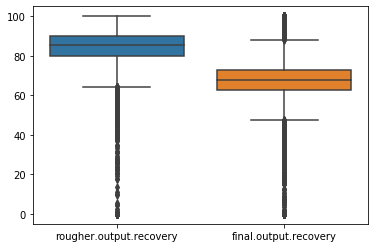

In [5]:
sns.boxplot(data=df_train.loc[:, ['rougher.output.recovery', 'final.output.recovery']]);

По этим данным можно сделать вывод, что значения recovery должны лежать в диапазоне от 0 до 100.

In [6]:
# Эффективность обогащения: Recovery = (C x (F - T) x 100) / (F x (C - T))
# C — доля золота в концентрате после флотации/очистки;
# F — доля золота в сырье/концентрате до флотации/очистки;
# T — доля золота в отвальных хвостах после флотации/очистки.
    
def recovery(c, f, t):
    return (c * (f - t) * 100) / (f * (c - t))

def get_recovery(row, name):
    # name: rougher or final
    c = row[name + '.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row[name + '.output.tail_au']
    return recovery(c, f, t)

In [7]:
def calc_mae(df_rec, name):
    # name: rougher or final
    print(name + '.output.recovery')
    print()
    df_rec[name + '.calculation.recovery'] = df_rec.apply(get_recovery, axis=1, name=name)
    recoveries_notna = df_rec[df_rec[name + '.output.recovery'].notna()][name + '.output.recovery']
    calc_recoveries_notna = df_rec.loc[recoveries_notna.index, name + '.calculation.recovery']
    print(recoveries_notna.shape)
    print()
    mae = mean_absolute_error(recoveries_notna, calc_recoveries_notna)
    print('MAE = {: .5f}'.format(mae))
    print('-'*40)

Чтобы при вычислении наших новых признаков `rougher.calculation.recovery` и `final.calculation.recovery` не произошло деления на ноль, необходимо, чтобы доля золота в начальном сырье не было нулевая и доли золота в концентрате не равнялась доле золота в отвальных хвостах.  

Поэтому предварительно нам необходимо проверить нашу таблицу df_train на наличие таких наблюдений и удалить их.

In [8]:
df_train[df_train['rougher.input.feed_au'] == 0].shape

(1159, 87)

In [9]:
df_train = df_train[df_train['rougher.input.feed_au'] > 0]
df_train.shape

(15618, 87)

In [10]:
df_train[df_train['rougher.output.concentrate_au'] == df_train['rougher.output.tail_au']].shape

(0, 87)

In [11]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
print(df_train[df_train['final.output.concentrate_au'] == df_train['final.output.tail_au']].shape)
df_train[df_train['final.output.concentrate_au'] == df_train['final.output.tail_au']].head()

(106, 87)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
129,2016-01-20 09:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,8.584221,NaN,7.25,0.152537,0.0,0.0,0.0,0.0,1.827074,0.292488,NaN,0.341507,1551.587754,-498.336451,1552.907397,-501.206564,1549.911949,-497.052816,1548.179538,-499.460565,-225515.881485,6631.844015,6570.403898,-0.000791,9.369476,NaN,201.150171,39.020065,NaN,2.436764,4.253805,2.288470,3.984708,2.259076,3.452338,3.163824,NaN,8.265500,NaN,NaN,0.457134,NaN,NaN,999.061279,-501.463505,1599.616373,-500.282772,1602.056522,-502.087341,1398.888526,-501.523897,1199.595977,-501.644274,1100.027509,-507.079590,2.198359,0.620318,NaN,0.473344,25.037660,-499.117250,23.011166,-499.955869,24.041757,-500.342165,22.993058,-500.086558,14.002423,-654.051206,12.054123,-553.770978,9.991036,-494.993322,7.976046,-500.127874,12.008321,-598.171229
379,2016-01-30 19:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.003140,NaN,8.24,0.002587,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1501.521655,-499.420463,1501.785391,-501.022510,1502.674767,-501.700707,1499.698023,-499.884584,-24.532791,14147.398995,-1637.360290,2.549378,1.254222

In [12]:
df_tmp = df_train[df_train['final.output.concentrate_au'] == df_train['final.output.tail_au']]
df_train.drop(df_tmp.index, axis=0, inplace=True)
df_train.shape

(15512, 87)

In [13]:
calc_mae(df_train, 'rougher')
calc_mae(df_train, 'final')

rougher.output.recovery

(14246,)

MAE =  0.00000
----------------------------------------
final.output.recovery

(15339,)

MAE =  0.00000
----------------------------------------


**Вывод.**  

Не пустые значения признаков `rougher.output.recovery` и `final.output.recovery`, соответствуют значениям, вычисленных по формуле эффективности обогащения.  

***

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся? 

Сформируем таблицу, в которой в качестве индексов будут выступать наименования всех признаков. В столбце `test` проставим 0 для тех признаков, которых нет в `df_test`.

In [14]:
columns_all = pd.DataFrame(index=df_train.columns)
columns2 = pd.DataFrame(index=df_test.columns)
columns2['test'] = 1
columns_all = columns_all.join(columns2)
columns_all['test'].fillna(0, inplace=True)
columns_all['test'] = columns_all['test'].astype('int')
columns_all.head()

,test
date,1
final.output.concentrate_ag,0
final.output.concentrate_pb,0
final.output.concentrate_sol,0
final.output.concentrate_au,0


In [15]:
# преобразование таблицы columns_all

stages = ['date', 'rougher', 'primary_cleaner', 'secondary_cleaner', 'final']
data = []
for idx in columns_all.index:
    ff = idx.split('.')
    ff = (str(stages.index(ff[0])) + '.' + idx).split('.')
    data.append(ff)

columns_all2 = pd.DataFrame(data, columns=['N', 'stage', 'type', 'name'], index=columns_all.index)
columns_all = columns_all.join(columns_all2)
columns_all.head()

,test,N,stage,type,name
date,1,0,date,None,None
final.output.concentrate_ag,0,4,final,output,concentrate_ag
final.output.concentrate_pb,0,4,final,output,concentrate_pb
final.output.concentrate_sol,0,4,final,output,concentrate_sol
final.output.concentrate_au,0,4,final,output,concentrate_au


In [16]:
columns_all[columns_all['test'] == 0].pivot_table(index=['N', 'stage', 'type'], 
                                                  columns = 'name', aggfunc='sum', values='test', fill_value='')

name                            au_pb_ratio concentrate_ag concentrate_au  \
N stage             type                                                    
1 rougher           calculation           0                                 
                    output                               0              0   
2 primary_cleaner   output                               0              0   
3 secondary_cleaner output                                                  
4 final             calculation                                             
                    output                               0              0   

name                            concentrate_pb concentrate_sol  \
N stage             type                                         
1 rougher           calculation                                  
                    output                   0               0   
2 primary_cleaner   output                   0               0   
3 secondary_cleaner output                                       
4 final             calculation                                  
                    output                   0               0   

name                            floatbank10_sulfate_to_au_feed  \
N stage             type                                         
1 rougher           calculation                              0   
                    output                                       
2 primary_cleaner   output                                       
3 secondary_cleaner output                                       
4 final             calculation                                  
                    output                                       

name                            floatbank11_sulfate_to_au_feed recovery  \
N stage             type                                                  
1 rougher           calculation                              0        0   
                    output                                            0   
2 primary_cleaner   output                                                
3 secondary_cleaner output                                                
4 final             calculation                                       0   
                    output                                            0   

name                            sulfate_to_au_concentrate tail_ag tail_au  \
N stage             type                                                    
1 rougher           calculation                         0                   
                    output                                      0       0   
2 primary_cleaner   output                                      0       0   
3 secondary_cleaner output                                      0       0   
4 final             calculation                                             
                    output                                      0       0   

name                            tail_pb tail_sol  
N stage             type                          
1 rougher           calculation                   
                    output            0        0  
2 primary_cleaner   output            0        0  
3 secondary_cleaner output            0        0  
4 final             calculation                   
                    output            0        0

Последняя сводная таблица наглядно показывает какие признаки отсутствуют в тестовой выбоке.  
Видно, что почти для всех этапов отсутствуют признаки типа output (выходные параметры продукта после текущего этапа).
Для первого этапа также отсутствуют признаки типа `calculation`, которые нам и не нужны.  
Попробуем сформировать таблицу без этих признаков `calculation`.

In [17]:
columns_all.query('test == 0 and type == "output"').pivot_table(index=['N', 'stage', 'type'], 
                                                                columns = 'name', 
                                                                aggfunc='sum', 
                                                                values='test', fill_value='')

,,name,concentrate_ag,concentrate_au,concentrate_pb,concentrate_sol,recovery,tail_ag,tail_au,tail_pb,tail_sol
N,stage,type,,,,,,,,,
1,rougher,output,0,0,0,0,0,0.0,0.0,0.0,0.0
2,primary_cleaner,output,0,0,0,0,,0.0,0.0,0.0,0.0
3,secondary_cleaner,output,,,,,,0.0,0.0,0.0,0.0
4,final,output,0,0,0,0,0,0.0,0.0,0.0,0.0


Ну вот, таблица стала еще более наглядной.  

Мы видим, что в тестовой выборке вообще нет данных по концентрации металлов после вторичной очистки. Просто эти данные должны полностью совпадать с финальными данными. Учтем это в будущем.  

На этапах первичной и вторичной очисток нет данных об эффективности обогащения (recovery). Но нам этого и не нужно.  

По условиям проекта нам нужно получить метрику sMAPE для чего нужно спрогнозировать:  
- эффективность обогащения чернового концентрата `rougher.output.recovery`;  
- эффективность обогащения финального концентрата `final.output.recovery`.  
    
Но формула расчета recovery включает в себя доли концентратов золота, которых нет в тестовой выборке.  
Поэтому, как уже говорилось ранее, нам нужно:  
- спрогнозировать эти концентраты и на их основании вычислить recovery как для начального этапа, так и для финального;
- спрогнозировать recovery на основании тех данных, которые есть в тестовых данных.
И уже потом вычислить sMAPE, сравнивая вычисленные recovery и спрогнозированные 


#### 1.4. Проведите предобработку данных.

Итак, какие данные нам нужны для дальнейшего анализа?  

Прежде всего нам нужно получить метрики sMAPE для чего нужно спрогнозировать:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.  

А для этого нам нужно:
- спрогнозировать `rougher.output.concentrate_au`, `rougher.input.feed_au`, `rougher.output.tail_au`, `final.output.concentrate_au` и `final.output.tail_au`.

Прогнозировать долю золота в сырье на начальном этапе (`rougher.input.feed_au`) мы можем только через другие параметры сырья на начальном этапе: `rougher.input.feed_ag`, `rougher.input.feed_pb`, `rougher.input.feed_rate`, `rougher.input.feed_size`, `rougher.input.feed_sol`.

А для прогнозирования доли золота в концентрате начального этапа (`rougher.output.concentrate_au`) мы уже должны учитывать не только начальные параметры сырья (перечисленные в предыдущем абзаце), но и другие параметры процесса очистки на данном этапе, такие как: `rougher.input.floatbank10_sulfate`, `rougher.input.floatbank10_xanthate`, и др.

А для прогнозирования доли золота в концентрате финального этапа (`final.output.concentrate_au`) мы уже должны учитывать еще и параметры процессов очистки на этапе первичной и вторичной очисток.

Ранее мы выяснили, что признак эффективности очистки вычислялся правильно. Но мы это проверили на тех значениях, которые были определены (не пустые).  
Давайте сначала посмотрим, сколько всего неопределенных значений recovery и попробуем посчитать значения по формуле.

In [18]:
columns_recovery = ['rougher.output.recovery', 'rougher.calculation.recovery', 
                    'final.output.recovery', 'final.calculation.recovery']
df_train.loc[:, columns_recovery].isna().sum()

rougher.output.recovery         1266
rougher.calculation.recovery    1010
final.output.recovery            173
final.calculation.recovery         8
dtype: int64

О чем это говорит?  
У нас 1266 наблюдений с пустыми значениями признака `rougher.output.recovery`. Из них 1010 в которых не вычислился признак `rougher.calculation.recovery`. Т.е. в 1010 случаях было не определено одно из входящих признаков для формулы вычисления. Аналогичная ситуация и для final.  

Поэтому сейчас займемся заполнением пропусков в прочих признаках, а в конце текущего пункта еще раз расчитаем `rougher.calculation.recovery` и `final.calculation.recovery`, рассмотрим оставшиеся пропуски.

**Подготовка данных для прогнозирования `rougher.input.feed_au` (rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol).**  

Будем действовать по следующей схеме:  
- если rougher.input.feed_au неопределен, и соответствующие доли других металлов тоже неопределены, то нам такие наблюдения не нужны;
- если rougher.input.feed_au равен нулю, и соответствующие доли других металлов тоже равны нулю, то нам такие наблюдения тоже не нужны;
- если rougher.input.feed_au неопределен, а соответствующие доли других металлов определены, то попробуем найти значения путем линейной регрессии.

Но для начала посмотрим матрицу корреляции - если есть сильно коррелируемые признаки, то пропущенные значения можно получить путем линейной аппроксимации того признака.

In [19]:
columns_for_feeds = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 
                     'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au']
df_tmp = df_train[columns_for_feeds]
df_tmp.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707


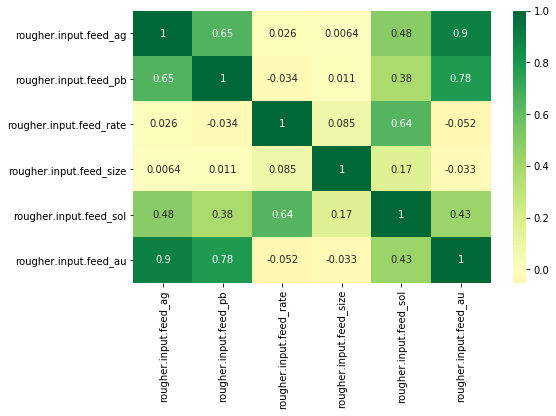

In [20]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_tmp.corr(), cmap='RdYlGn', center=0, annot=True);

Мы видим, что, например, `rougher.input.feed_au` сильно взаимно коррелирует с `rougher.input.feed_ag`.   
В таких случае мы можем применить линейную аппроксимацию от одного признака.  
В случаях, где сильных корреляций не замечено, будем применять линейную регрессию сразу по нескольким признакам.

In [21]:
df_tmp.isna().sum()

rougher.input.feed_ag        0
rougher.input.feed_pb      140
rougher.input.feed_rate    227
rougher.input.feed_size    147
rougher.input.feed_sol     176
rougher.input.feed_au        0
dtype: int64

Вначале рассмотрим пропуски в признаке доли свинца `rougher.input.feed_pb`.  
Как мы видели из диаграммы, этот признак сильно коррелирует с долями серебра и золота, но недостаточно, чтобы сделать линейную аппроксимацию от одного из этих признаков.  
Сделаем линейную регрессию, в тренировочной выборке которой будут и доля серебра, и доля золота.

In [22]:
# модель линейной регрессии для заполнения пропусков

def filling_empties(df_, features_, target_, test_, name):
    print('Заполнение поля `', name)
    print()
    print('размер обучающей выборки:', features_.shape)
    print('размер целевого признака:', target_.shape)
    print('размер тестовой выборки:', test_.shape)
    print()
    model_ = LinearRegression()
    model_.fit(features_, target_)

    predicted_test = model_.predict(test_)
    predicted_test = pd.DataFrame(predicted_test, index=test_.index)

    for idx in predicted_test.index:
        df_.loc[idx, name] = predicted_test.loc[idx, 0]

    print('in df_:')
    print(df_.loc[predicted_test.index, name].head())
    print('-'*40)

In [23]:
# заполнение пропусков в признаке rougher.input.feed_pb

features_ = df_tmp[df_tmp['rougher.input.feed_pb'].notna()].loc[:,['rougher.input.feed_au', 'rougher.input.feed_au']]
target_ = df_tmp[df_tmp['rougher.input.feed_pb'].notna()]['rougher.input.feed_pb']
test_ = df_tmp[df_tmp['rougher.input.feed_pb'].isna()].loc[:,['rougher.input.feed_au', 'rougher.input.feed_au']]

filling_empties(df_train, features_, target_, test_, 'rougher.input.feed_pb')

# обновление df_tmp
df_tmp = df_train[columns_for_feeds]


Заполнение поля ` rougher.input.feed_pb

размер обучающей выборки: (15372, 2)
размер целевого признака: (15372,)
размер тестовой выборки: (140, 2)

in df_:
394    1.682948
496    1.951485
700    0.317131
751    1.467347
812    0.835143
Name: rougher.input.feed_pb, dtype: float64
----------------------------------------


Далее рассмотрим признак `rougher.input.feed_sol`. Этот признак сильно коррелирует с долями металлов - их и применим в обучающей выборке.

In [24]:
# заполнение пропусков в признаке rougher.input.feed_sol

features_ = (
    df_tmp[df_tmp['rougher.input.feed_sol'].notna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb']]
)
target_ = df_tmp[df_tmp['rougher.input.feed_sol'].notna()]['rougher.input.feed_sol']
test_ = (
    df_tmp[df_tmp['rougher.input.feed_sol'].isna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb']]
)

filling_empties(df_train, features_, target_, test_, 'rougher.input.feed_sol')

# обновление df_tmp
df_tmp = df_train[columns_for_feeds]


Заполнение поля ` rougher.input.feed_sol

размер обучающей выборки: (15336, 3)
размер целевого признака: (15336,)
размер тестовой выборки: (176, 3)

in df_:
47     31.606438
98     28.417041
131    28.299398
137    31.551667
318    32.405718
Name: rougher.input.feed_sol, dtype: float64
----------------------------------------


Далее рассмотрим признак rougher.input.feed_rate.   
Этот признак сильно коррелирует только с rougher.input.feed_sol. Но в обучающей выборке применим все признаки, кроме rougher.input.feed_size.

In [25]:
# заполнение пропусков в признаке rougher.input.feed_rate

features_ = (
    df_tmp[df_tmp['rougher.input.feed_rate'].notna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
)
target_ = df_tmp[df_tmp['rougher.input.feed_rate'].notna()]['rougher.input.feed_rate']
test_ = (
    df_tmp[df_tmp['rougher.input.feed_rate'].isna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
)

filling_empties(df_train, features_, target_, test_, 'rougher.input.feed_rate')

# обновление df_tmp
df_tmp = df_train[columns_for_feeds]

Заполнение поля ` rougher.input.feed_rate

размер обучающей выборки: (15285, 4)
размер целевого признака: (15285,)
размер тестовой выборки: (227, 4)

in df_:
154      513.426905
11698    455.153942
11699    455.753868
11700    454.444190
11701    435.865088
Name: rougher.input.feed_rate, dtype: float64
----------------------------------------


Ну и последний признак rougher.input.feed_size.
Этот признак слабо коррелирует со всеми признаками, поэтому нужно делать обучающую выборку со всеми прочими признаками в совокупности.

In [26]:
# заполнение пропусков в признаке rougher.input.feed_size

features_ = df_tmp[df_tmp['rougher.input.feed_size'].notna()]
features_ = features_.drop('rougher.input.feed_size', axis=1)
target_ = df_tmp[df_tmp['rougher.input.feed_size'].notna()]['rougher.input.feed_size']
test_ = df_tmp[df_tmp['rougher.input.feed_size'].isna()]
test_ = test_.drop('rougher.input.feed_size', axis=1)

filling_empties(df_train, features_, target_, test_, 'rougher.input.feed_size')

# обновление df_tmp
df_tmp = df_train[columns_for_feeds]

Заполнение поля ` rougher.input.feed_size

размер обучающей выборки: (15365, 5)
размер целевого признака: (15365,)
размер тестовой выборки: (147, 5)

in df_:
154     62.348873
1336    55.537225
1359    56.316869
1360    55.478814
1511    55.044715
Name: rougher.input.feed_size, dtype: float64
----------------------------------------


Теперь аналогичную проверку нужно сделать и для df_test.

In [27]:
df_tmp_test = df_test[columns_for_feeds]
df_tmp_test.shape

(5856, 6)

In [28]:
df_tmp_test.isna().sum()

rougher.input.feed_ag      16
rougher.input.feed_pb      16
rougher.input.feed_rate    40
rougher.input.feed_size    22
rougher.input.feed_sol     67
rougher.input.feed_au      16
dtype: int64

In [29]:
# удаление наблюдений, у которых rougher.input.feed_au равна NaN

rows_for_drop = df_tmp_test[df_tmp_test['rougher.input.feed_au'].isna()].index
print('Размеры df_test до удаления:', df_test.shape)
df_test = df_test.drop(rows_for_drop)
print('Размеры df_test после удаления:', df_test.shape)
print()
df_tmp_test = df_test[columns_for_feeds]
df_tmp_test.isna().sum()

Размеры df_test до удаления: (5856, 53)
Размеры df_test после удаления: (5840, 53)



rougher.input.feed_ag       0
rougher.input.feed_pb       0
rougher.input.feed_rate    24
rougher.input.feed_size     6
rougher.input.feed_sol     51
rougher.input.feed_au       0
dtype: int64

In [30]:
# заполнение пропусков в признаке rougher.input.feed_sol
features_ = (
    df_tmp_test[df_tmp_test['rougher.input.feed_sol'].notna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb']]
)
target_ = df_tmp_test[df_tmp_test['rougher.input.feed_sol'].notna()]['rougher.input.feed_sol']
test_ = (
    df_tmp_test[df_tmp_test['rougher.input.feed_sol'].isna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb']]
)
filling_empties(df_test, features_, target_, test_, 'rougher.input.feed_sol')
# обновление df_tmp_test
df_tmp_test = df_test[columns_for_feeds]

# заполнение пропусков в признаке rougher.input.feed_rate
features_ = (
    df_tmp_test[df_tmp_test['rougher.input.feed_rate'].notna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
)
target_ = df_tmp_test[df_tmp_test['rougher.input.feed_rate'].notna()]['rougher.input.feed_rate']
test_ = (
    df_tmp_test[df_tmp_test['rougher.input.feed_rate'].isna()]
    .loc[:,['rougher.input.feed_au', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
)
filling_empties(df_test, features_, target_, test_, 'rougher.input.feed_rate')
# обновление df_tmp_test
df_tmp_test = df_test[columns_for_feeds]

# заполнение пропусков в признаке rougher.input.feed_size
features_ = df_tmp_test[df_tmp_test['rougher.input.feed_size'].notna()]
features_ = features_.drop('rougher.input.feed_size', axis=1)
target_ = df_tmp_test[df_tmp_test['rougher.input.feed_size'].notna()]['rougher.input.feed_size']
test_ = df_tmp_test[df_tmp_test['rougher.input.feed_size'].isna()]
test_ = test_.drop('rougher.input.feed_size', axis=1)
filling_empties(df_test, features_, target_, test_, 'rougher.input.feed_size')

# обновление df_tmp_test
df_tmp_test = df_test[columns_for_feeds]
print('\ndf_tmp.isna():\n', df_tmp_test.isna().sum())
print('-'*40)

Заполнение поля ` rougher.input.feed_sol

размер обучающей выборки: (5789, 3)
размер целевого признака: (5789,)
размер тестовой выборки: (51, 3)

in df_:
197    33.963905
254    33.191182
259    32.722688
264    15.062685
265    37.757991
Name: rougher.input.feed_sol, dtype: float64
----------------------------------------
Заполнение поля ` rougher.input.feed_rate

размер обучающей выборки: (5816, 4)
размер целевого признака: (5816,)
размер тестовой выборки: (24, 4)

in df_:
5086    54.600862
5196    75.712034
5197    32.567996
5198    32.567996
5199    32.567996
Name: rougher.input.feed_rate, dtype: float64
----------------------------------------
Заполнение поля ` rougher.input.feed_size

размер обучающей выборки: (5834, 5)
размер целевого признака: (5834,)
размер тестовой выборки: (6, 5)

in df_:
3016    48.737619
3024    48.736604
3025    48.736421
3026    48.736567
3027    48.736443
Name: rougher.input.feed_size, dtype: float64
----------------------------------------

df_tmp.isna

***

**Подготовка данных для прогнозирования `rougher.output.concentrate_au` .**  

При рассмотрении данных обнаружилось очень большое число наблюдений, у которых доля золота в начальном сырье или в концентрате очень незначительное. Примем за пороговое значение 1%, т.е. если доля золота в концентрате менее 1%, то нам такие наблюдения не интересны и мы их удалим.


In [32]:
columns_need = []
for col in df_train.columns:
    if col.startswith('rougher'):
        if col.find('recovery') == -1 and col.find('calculation') == -1:
            columns_need.append(col)
            
df_tmp = df_train[columns_need]
df_tmp.isna().sum()

rougher.input.feed_ag                    0
rougher.input.feed_pb                    0
rougher.input.feed_rate                  0
rougher.input.feed_size                  0
rougher.input.feed_sol                   0
rougher.input.feed_au                    0
rougher.input.floatbank10_sulfate      392
rougher.input.floatbank10_xanthate      93
rougher.input.floatbank11_sulfate      375
rougher.input.floatbank11_xanthate     804
rougher.output.concentrate_ag            0
rougher.output.concentrate_pb            0
rougher.output.concentrate_sol          65
rougher.output.concentrate_au            0
rougher.output.tail_ag                1011
rougher.output.tail_pb                   0
rougher.output.tail_sol               1010
rougher.output.tail_au                1010
rougher.state.floatbank10_a_air         16
rougher.state.floatbank10_a_level       16
rougher.state.floatbank10_b_air         16
rougher.state.floatbank10_b_level       16
rougher.state.floatbank10_c_air         16
rougher.sta

In [33]:
df_tmp[df_tmp['rougher.output.concentrate_au'] < 1].count()

rougher.input.feed_ag                 790
rougher.input.feed_pb                 790
rougher.input.feed_rate               790
rougher.input.feed_size               790
rougher.input.feed_sol                790
rougher.input.feed_au                 790
rougher.input.floatbank10_sulfate     482
rougher.input.floatbank10_xanthate    709
rougher.input.floatbank11_sulfate     468
rougher.input.floatbank11_xanthate    426
rougher.output.concentrate_ag         790
rougher.output.concentrate_pb         790
rougher.output.concentrate_sol        789
rougher.output.concentrate_au         790
rougher.output.tail_ag                400
rougher.output.tail_pb                790
rougher.output.tail_sol               400
rougher.output.tail_au                400
rougher.state.floatbank10_a_air       775
rougher.state.floatbank10_a_level     775
rougher.state.floatbank10_b_air       775
rougher.state.floatbank10_b_level     775
rougher.state.floatbank10_c_air       775
rougher.state.floatbank10_c_level 

In [34]:
# удаление наблюдений, у которых rougher.input.concentrate_au менее 1

df_train = df_train[df_train['rougher.output.concentrate_au'] > 1]
print(df_train.shape)

(14722, 89)


In [35]:
# обновление df_tmp
df_tmp = df_train[columns_need]
df_tmp.isna().sum()

rougher.input.feed_ag                   0
rougher.input.feed_pb                   0
rougher.input.feed_rate                 0
rougher.input.feed_size                 0
rougher.input.feed_sol                  0
rougher.input.feed_au                   0
rougher.input.floatbank10_sulfate      84
rougher.input.floatbank10_xanthate     12
rougher.input.floatbank11_sulfate      53
rougher.input.floatbank11_xanthate    440
rougher.output.concentrate_ag           0
rougher.output.concentrate_pb           0
rougher.output.concentrate_sol         64
rougher.output.concentrate_au           0
rougher.output.tail_ag                621
rougher.output.tail_pb                  0
rougher.output.tail_sol               620
rougher.output.tail_au                620
rougher.state.floatbank10_a_air         1
rougher.state.floatbank10_a_level       1
rougher.state.floatbank10_b_air         1
rougher.state.floatbank10_b_level       1
rougher.state.floatbank10_c_air         1
rougher.state.floatbank10_c_level 

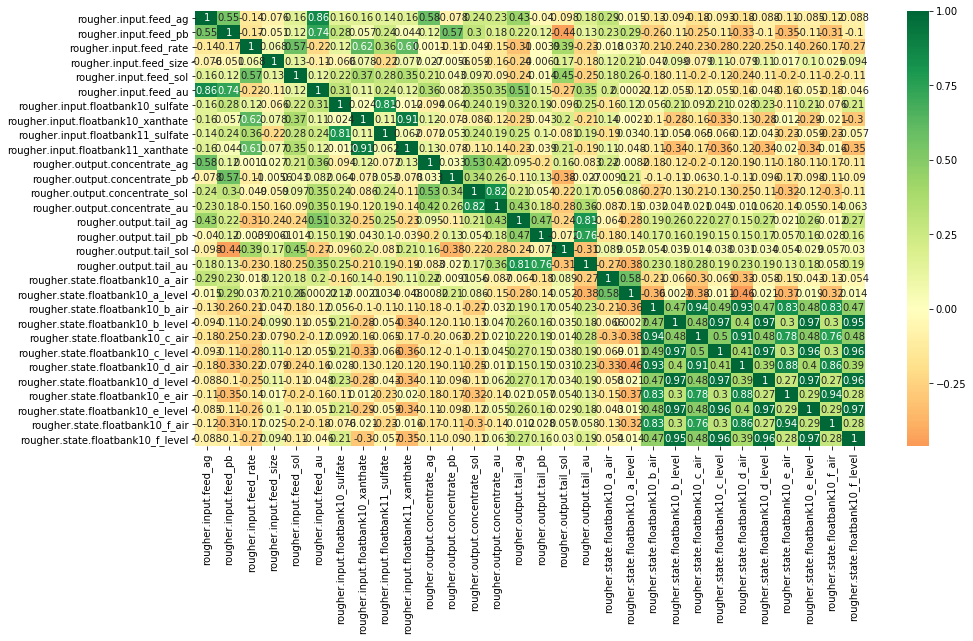

In [36]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_tmp.corr(), cmap='RdYlGn', center=0, annot=True);

Думаю, что можно смело удалить одно наблюдение, у которого rougher.state.floatbank... пропущен.  

Пропуски признака rougher.output.concentrate_sol можно вычислить через доли прочих металлов в концентрате и доли солей в начальном сырье.  

Доли металлов в отвальных хвостах будем вычислять в последнюю очередь, когда все данных по процессам будут заполнены.  

Признаки rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level и проч. довольно сильно взаимно коррелированы, поэтому признак rougher.state.floatbank10_e_air вычислим через другие rougher.state.floatbank10.  

Признаки rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate,  rougher.input.floatbank11_xanthate должны зависить долько от начального сырья, размер гранул и подачи воздуха. 

In [37]:
df_train = df_train[df_train['rougher.state.floatbank10_a_air'].notna()]
# обновление df_tmp
df_tmp = df_train[columns_need]

In [38]:
# заполнение пропусков в признаке rougher.output.concentrate_sol
features_ = (
    df_tmp[df_tmp['rougher.output.concentrate_sol'].notna()]
    .loc[:,['rougher.input.feed_sol', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
            'rougher.output.concentrate_au']]
)
target_ = df_tmp[df_tmp['rougher.output.concentrate_sol'].notna()]['rougher.output.concentrate_sol']
test_ = (
    df_tmp[df_tmp['rougher.output.concentrate_sol'].isna()]
    .loc[:,['rougher.input.feed_sol', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
            'rougher.output.concentrate_au']]
)
filling_empties(df_train, features_, target_, test_, 'rougher.output.concentrate_sol')

# обновление df_tmp_test
df_tmp = df_train[columns_need]

Заполнение поля ` rougher.output.concentrate_sol

размер обучающей выборки: (14657, 4)
размер целевого признака: (14657,)
размер тестовой выборки: (64, 4)

in df_:
98      11.193145
307     18.446583
1852     1.212146
1853    19.098727
1924    15.235485
Name: rougher.output.concentrate_sol, dtype: float64
----------------------------------------


In [39]:
# заполнение пропусков в признаке rougher.state.floatbank10_e_air
cols_for_e_air = [col for col in df_tmp.columns 
                  if col.startswith('rougher.state') and not col.endswith('e_air')]
features_ = (
    df_tmp[df_tmp['rougher.state.floatbank10_e_air'].notna()]
    .loc[:,cols_for_e_air]
)
target_ = df_tmp[df_tmp['rougher.state.floatbank10_e_air'].notna()]['rougher.state.floatbank10_e_air']
test_ = (
    df_tmp[df_tmp['rougher.state.floatbank10_e_air'].isna()]
    .loc[:,cols_for_e_air]
)
filling_empties(df_train, features_, target_, test_, 'rougher.state.floatbank10_e_air')

# обновление df_tmp_test
df_tmp = df_train[columns_need]

Заполнение поля ` rougher.state.floatbank10_e_air

размер обучающей выборки: (14298, 11)
размер целевого признака: (14298,)
размер тестовой выборки: (423, 11)

in df_:
11638    853.786076
11639    854.290388
11640    852.924075
11641    855.686232
11642    852.457906
Name: rougher.state.floatbank10_e_air, dtype: float64
----------------------------------------


In [40]:
# заполнение пропусков в признаке rougher.input.floatbank10_sulfate
cols_for_sulfate = [col for col in df_tmp.columns if col.startswith('rougher.input.feed')]
features_ = df_tmp[df_tmp['rougher.input.floatbank10_sulfate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp[df_tmp['rougher.input.floatbank10_sulfate'].notna()]['rougher.input.floatbank10_sulfate']
test_ = df_tmp[df_tmp['rougher.input.floatbank10_sulfate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_train, features_, target_, test_, 'rougher.input.floatbank10_sulfate')
df_tmp = df_train[columns_need]

# заполнение пропусков в признаке rougher.input.floatbank10_xanthate
features_ = df_tmp[df_tmp['rougher.input.floatbank10_xanthate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp[df_tmp['rougher.input.floatbank10_xanthate'].notna()]['rougher.input.floatbank10_xanthate']
test_ = df_tmp[df_tmp['rougher.input.floatbank10_xanthate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_train, features_, target_, test_, 'rougher.input.floatbank10_xanthate')
df_tmp = df_train[columns_need]

# заполнение пропусков в признаке rougher.input.floatbank11_sulfate
cols_for_sulfate.append('rougher.input.floatbank10_sulfate')
features_ = df_tmp[df_tmp['rougher.input.floatbank11_sulfate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp[df_tmp['rougher.input.floatbank11_sulfate'].notna()]['rougher.input.floatbank11_sulfate']
test_ = df_tmp[df_tmp['rougher.input.floatbank11_sulfate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_train, features_, target_, test_, 'rougher.input.floatbank11_sulfate')
df_tmp = df_train[columns_need]

# заполнение пропусков в признаке rougher.input.floatbank11_sulfate
cols_for_sulfate.append('rougher.input.floatbank10_xanthate')
features_ = df_tmp[df_tmp['rougher.input.floatbank11_xanthate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp[df_tmp['rougher.input.floatbank11_xanthate'].notna()]['rougher.input.floatbank11_xanthate']
test_ = df_tmp[df_tmp['rougher.input.floatbank11_xanthate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_train, features_, target_, test_, 'rougher.input.floatbank11_xanthate')

# обновление df_tmp_test
df_tmp = df_train[columns_need]

Заполнение поля ` rougher.input.floatbank10_sulfate

размер обучающей выборки: (14638, 6)
размер целевого признака: (14638,)
размер тестовой выборки: (83, 6)

in df_:
98      4.455093
812    -0.217388
1277    8.505045
1278    7.788439
1279    8.381214
Name: rougher.input.floatbank10_sulfate, dtype: float64
----------------------------------------
Заполнение поля ` rougher.input.floatbank10_xanthate

размер обучающей выборки: (14710, 6)
размер целевого признака: (14710,)
размер тестовой выборки: (11, 6)

in df_:
1298     3.555240
1301     3.578790
10869    1.843372
10870    1.857181
10871    1.858409
Name: rougher.input.floatbank10_xanthate, dtype: float64
----------------------------------------
Заполнение поля ` rougher.input.floatbank11_sulfate

размер обучающей выборки: (14669, 7)
размер целевого признака: (14669,)
размер тестовой выборки: (52, 7)

in df_:
98      0.422813
377    -2.958676
812    -2.894164
813    -2.326298
1139   -2.073980
Name: rougher.input.floatbank11_sulfate, dt

In [41]:
# заполнение пропусков в признаке tail_ag, tail_sol и tail_au
target_cols = ['rougher.output.tail_ag', 'rougher.output.tail_sol', 'rougher.output.tail_au']
cols_for_tails = []
for col in df_tmp.columns:
    if not (col in target_cols):
        cols_for_tails.append(col)
        
features_ = df_tmp[df_tmp['rougher.output.tail_ag'].notna()].loc[:,cols_for_tails]
target_ = df_tmp[df_tmp['rougher.output.tail_ag'].notna()].loc[:, 'rougher.output.tail_ag']
test_ = df_tmp[df_tmp['rougher.output.tail_ag'].isna()].loc[:,cols_for_tails]
filling_empties(df_train, features_, target_, test_, 'rougher.output.tail_ag')

features_ = df_tmp[df_tmp['rougher.output.tail_sol'].notna()].loc[:,cols_for_tails]
target_ = df_tmp[df_tmp['rougher.output.tail_sol'].notna()].loc[:, 'rougher.output.tail_sol']
test_ = df_tmp[df_tmp['rougher.output.tail_sol'].isna()].loc[:,cols_for_tails]
filling_empties(df_train, features_, target_, test_, 'rougher.output.tail_sol')

features_ = df_tmp[df_tmp['rougher.output.tail_au'].notna()].loc[:,cols_for_tails]
target_ = df_tmp[df_tmp['rougher.output.tail_au'].notna()].loc[:, 'rougher.output.tail_au']
test_ = df_tmp[df_tmp['rougher.output.tail_au'].isna()].loc[:,cols_for_tails]
filling_empties(df_train, features_, target_, test_, 'rougher.output.tail_au')

# обновление df_tmp_test
df_tmp = df_train[columns_need]
df_tmp.isna().sum()

Заполнение поля ` rougher.output.tail_ag

размер обучающей выборки: (14100, 27)
размер целевого признака: (14100,)
размер тестовой выборки: (621, 27)

in df_:
130    7.097832
131    6.750472
132    6.790596
133    6.383074
134    6.174046
Name: rougher.output.tail_ag, dtype: float64
----------------------------------------
Заполнение поля ` rougher.output.tail_sol

размер обучающей выборки: (14101, 27)
размер целевого признака: (14101,)
размер тестовой выборки: (620, 27)

in df_:
130    12.584927
131    17.203105
132    13.742518
133    15.911127
134    16.644922
Name: rougher.output.tail_sol, dtype: float64
----------------------------------------
Заполнение поля ` rougher.output.tail_au

размер обучающей выборки: (14101, 27)
размер целевого признака: (14101,)
размер тестовой выборки: (620, 27)

in df_:
130    2.287052
131    1.967124
132    2.238659
133    2.207068
134    2.102495
Name: rougher.output.tail_au, dtype: float64
----------------------------------------


rougher.input.feed_ag                 0
rougher.input.feed_pb                 0
rougher.input.feed_rate               0
rougher.input.feed_size               0
rougher.input.feed_sol                0
rougher.input.feed_au                 0
rougher.input.floatbank10_sulfate     0
rougher.input.floatbank10_xanthate    0
rougher.input.floatbank11_sulfate     0
rougher.input.floatbank11_xanthate    0
rougher.output.concentrate_ag         0
rougher.output.concentrate_pb         0
rougher.output.concentrate_sol        0
rougher.output.concentrate_au         0
rougher.output.tail_ag                0
rougher.output.tail_pb                0
rougher.output.tail_sol               0
rougher.output.tail_au                0
rougher.state.floatbank10_a_air       0
rougher.state.floatbank10_a_level     0
rougher.state.floatbank10_b_air       0
rougher.state.floatbank10_b_level     0
rougher.state.floatbank10_c_air       0
rougher.state.floatbank10_c_level     0
rougher.state.floatbank10_d_air       0


***
**Проделаем аналогичные операции для тестовой выборки.**

In [42]:
columns_need_test = []
for col in df_test.columns:
    if col.startswith('rougher'):
        columns_need_test.append(col) 
            
df_tmp_test = df_test[columns_need_test]
df_tmp_test.isna().sum()

rougher.input.feed_ag                   0
rougher.input.feed_pb                   0
rougher.input.feed_rate                 0
rougher.input.feed_size                 0
rougher.input.feed_sol                  0
rougher.input.feed_au                   0
rougher.input.floatbank10_sulfate     241
rougher.input.floatbank10_xanthate    107
rougher.input.floatbank11_sulfate      39
rougher.input.floatbank11_xanthate    337
rougher.state.floatbank10_a_air         1
rougher.state.floatbank10_a_level       0
rougher.state.floatbank10_b_air         1
rougher.state.floatbank10_b_level       0
rougher.state.floatbank10_c_air         1
rougher.state.floatbank10_c_level       0
rougher.state.floatbank10_d_air         1
rougher.state.floatbank10_d_level       0
rougher.state.floatbank10_e_air         1
rougher.state.floatbank10_e_level       0
rougher.state.floatbank10_f_air         1
rougher.state.floatbank10_f_level       0
dtype: int64

In [43]:
# удаление наблюдений, у которых rougher.state.floatbank10_a_air равно NaN
df_test = df_test[df_test['rougher.state.floatbank10_a_air'].notna()]


In [44]:
# удаление наблюдений, у которых rougher.input.feed_au равно 0
df_test = df_test[df_test['rougher.input.feed_au'] > 0]

# обновление df_tmp_test
df_tmp_test = df_test[columns_need_test]

In [45]:
# заполнение пропусков в признаке rougher.input.floatbank10_sulfate
cols_for_sulfate = [col for col in df_tmp_test.columns if col.startswith('rougher.input.feed')]
features_ = df_tmp_test[df_tmp_test['rougher.input.floatbank10_sulfate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp_test[df_tmp_test['rougher.input.floatbank10_sulfate'].notna()]['rougher.input.floatbank10_sulfate']
test_ = df_tmp_test[df_tmp_test['rougher.input.floatbank10_sulfate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_test, features_, target_, test_, 'rougher.input.floatbank10_sulfate')
df_tmp_test = df_test[columns_need_test]

# заполнение пропусков в признаке rougher.input.floatbank10_xanthate
features_ = df_tmp_test[df_tmp_test['rougher.input.floatbank10_xanthate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp_test[df_tmp_test['rougher.input.floatbank10_xanthate'].notna()]['rougher.input.floatbank10_xanthate']
test_ = df_tmp_test[df_tmp_test['rougher.input.floatbank10_xanthate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_test, features_, target_, test_, 'rougher.input.floatbank10_xanthate')
df_tmp_test = df_test[columns_need_test]

# заполнение пропусков в признаке rougher.input.floatbank11_sulfate
cols_for_sulfate.append('rougher.input.floatbank10_sulfate')
features_ = df_tmp_test[df_tmp_test['rougher.input.floatbank11_sulfate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp_test[df_tmp_test['rougher.input.floatbank11_sulfate'].notna()]['rougher.input.floatbank11_sulfate']
test_ = df_tmp_test[df_tmp_test['rougher.input.floatbank11_sulfate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_test, features_, target_, test_, 'rougher.input.floatbank11_sulfate')
df_tmp_test = df_test[columns_need_test]

# заполнение пропусков в признаке rougher.input.floatbank11_sulfate
cols_for_sulfate.append('rougher.input.floatbank10_xanthate')
features_ = df_tmp_test[df_tmp_test['rougher.input.floatbank11_xanthate'].notna()].loc[:,cols_for_sulfate]
target_ = df_tmp_test[df_tmp_test['rougher.input.floatbank11_xanthate'].notna()]['rougher.input.floatbank11_xanthate']
test_ = df_tmp_test[df_tmp_test['rougher.input.floatbank11_xanthate'].isna()].loc[:,cols_for_sulfate]
filling_empties(df_test, features_, target_, test_, 'rougher.input.floatbank11_xanthate')

# обновление df_tmp_test
df_tmp_test = df_test[columns_need_test]
df_tmp_test.isna().sum()

Заполнение поля ` rougher.input.floatbank10_sulfate

размер обучающей выборки: (5460, 6)
размер целевого признака: (5460,)
размер тестовой выборки: (11, 6)

in df_:
30     -0.352756
309     1.650847
705     0.455795
1695    1.610759
1696   -0.085041
Name: rougher.input.floatbank10_sulfate, dtype: float64
----------------------------------------
Заполнение поля ` rougher.input.floatbank10_xanthate

размер обучающей выборки: (5468, 6)
размер целевого признака: (5468,)
размер тестовой выборки: (3, 6)

in df_:
3452    1.988995
3453    1.788268
4549    0.343095
Name: rougher.input.floatbank10_xanthate, dtype: float64
----------------------------------------
Заполнение поля ` rougher.input.floatbank11_sulfate

размер обучающей выборки: (5460, 7)
размер целевого признака: (5460,)
размер тестовой выборки: (11, 7)

in df_:
523     1.753384
5493    5.772286
5494    9.651435
5495    9.841251
5496    9.816435
Name: rougher.input.floatbank11_sulfate, dtype: float64
---------------------------------

rougher.input.feed_ag                 0
rougher.input.feed_pb                 0
rougher.input.feed_rate               0
rougher.input.feed_size               0
rougher.input.feed_sol                0
rougher.input.feed_au                 0
rougher.input.floatbank10_sulfate     0
rougher.input.floatbank10_xanthate    0
rougher.input.floatbank11_sulfate     0
rougher.input.floatbank11_xanthate    0
rougher.state.floatbank10_a_air       0
rougher.state.floatbank10_a_level     0
rougher.state.floatbank10_b_air       0
rougher.state.floatbank10_b_level     0
rougher.state.floatbank10_c_air       0
rougher.state.floatbank10_c_level     0
rougher.state.floatbank10_d_air       0
rougher.state.floatbank10_d_level     0
rougher.state.floatbank10_e_air       0
rougher.state.floatbank10_e_level     0
rougher.state.floatbank10_f_air       0
rougher.state.floatbank10_f_level     0
dtype: int64

***

**А для прогнозирования доли золота в концентрате и отвальных хвостах финального этапа мы уже должны учитывать выходные параметры концентратов предыдущего этапа и параметры процессов очистки на финальном этапе первичной и вторичной очисток.**  

Другими словами, чтобы получить значения долей веществ в концентратах и в отвалах финального этапа нужно знать выходные доли веществ в концентратах первичной обработки и данные процессов вторичной обработки.  
Но мы имеем не все данные выходных долей веществ в концентратах первичной обработки. Чтобы их вычислить мы должны иметь данные о выходных долях веществ в концентратах начального этапа и данные процессов первичной обработки.

Рассмотрим пропуски в таблице df_train финального этапа.  
Как не удивительно, пропусков в признаке `final.output.concentrate_au` осталось всего 4 шт. А в `final.output.tail_au` вообще не осталось пропусков.  

In [46]:
df_train.loc[:,[col for col in df_train.columns if col.startswith('final')]].isna().sum()

final.output.concentrate_ag       5
final.output.concentrate_pb       5
final.output.concentrate_sol    298
final.output.concentrate_au       4
final.output.recovery           149
final.output.tail_ag              0
final.output.tail_pb            117
final.output.tail_sol            52
final.output.tail_au              0
final.calculation.recovery        4
dtype: int64

In [47]:
df_train[df_train['final.output.concentrate_au'].isna()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.calculation.recovery,final.calculation.recovery
6108,2017-01-25 11:59:59,NaN,NaN,NaN,NaN,NaN,9.409154,2.548048,NaN,3.331674,42.179950,4.034747,7.57,0.492545,4.864748,NaN,NaN,34.808594,18.868371,3.066522,NaN,5.734666,1599.567480,-498.990583,1601.108768,-498.027943,1595.522198,-457.911270,1598.989294,-512.089995,29018.370275,3232.116050,3221.926184,3.273054,9.202466,2.675474,386.551563,39.679309,23.314077,8.756972,9.316008,4.997611,9.140392,5.002711,13.242564,6.532532,38.224940,27.647086,81.951728,6.510978,0.335876,10.077148,2.134560,997.683610,-499.878169,1099.584703,-499.057024,1098.691795,-500.754265,1108.335428,-501.402139,899.170341,-500.170490,899.393584,-501.056625,15.019981,4.702650,NaN,5.275480,30.040767,-499.994819,27.933523,-500.146103,34.983296,-499.498846,21.966408,-499.602684,20.959585,-500.048338,20.971450,-500.611341,22.981215,-500.233314,20.033544,-500.093280,25.001350,-600.261232,81.951728,NaN
6109,2017-01-25 12:59:59,NaN,NaN,NaN,NaN,NaN,9.723551,2.498159,4.805643,3.460515,93.334247,8.077361,6.68,0.695291,7.742970,NaN,NaN,35.410727,

Как мы видим, во всех случаях пропущены значения не только признака `final.output.concentrate_au`, но и многих других в нескольких этапах.  
Нам проще удалить эти наблюдения, чем вычислять эти пропуски.

In [48]:
df_train = df_train[df_train['final.output.concentrate_au'].notna()]

df_train.loc[:,[col for col in df_train.columns if col.startswith('final')]].isna().sum()

final.output.concentrate_ag       1
final.output.concentrate_pb       1
final.output.concentrate_sol    294
final.output.concentrate_au       0
final.output.recovery           145
final.output.tail_ag              0
final.output.tail_pb            117
final.output.tail_sol            50
final.output.tail_au              0
final.calculation.recovery        0
dtype: int64

Ну вот, у нас оказались заполнены все `final.calculation.recovery`, которые мы вычисляли по формуле.  
А почему в 145 наблюдениях в признаке `final.output.recovery` стоят пропуски?  
Давайте сравним.

In [49]:
cols_need = ['rougher.input.feed_au', 'final.output.concentrate_au', 'final.output.tail_au', 
             'final.output.recovery', 'final.calculation.recovery']
df_tmp = df_train[cols_need]
df_tmp[df_tmp['final.output.recovery'].isna()].head()

,rougher.input.feed_au,final.output.concentrate_au,final.output.tail_au,final.output.recovery,final.calculation.recovery
372,0.139652,4.304974,0.164934,NaN,-18.824536
375,3.341982,23.704807,3.942216,NaN,-21.543126
377,3.501578,36.597453,7.723369,NaN,-152.818370
433,6.484205,35.686803,6.693746,NaN,-3.977653
560,1.921101,45.273819,2.384391,NaN,-25.456569


In [50]:
df_tmp[df_tmp['final.output.recovery'].isna()]['final.calculation.recovery'].unique()[:20]

array([  -18.82453635,   -21.54312644,  -152.81837025,    -3.97765288,
         -25.45656941,  -158.42918889, -2230.67299914,  -117.53972414,
        -599.4379683 ,    -5.76841062,   -14.30923799,   -44.80740915,
         -75.41722085,    -2.36338183,  -106.7546721 ,  -143.91625289,
        -138.23476295,  -265.19045032,   -96.17887289,   -58.92275147])

Как мы видим, во всех этих случаях вычислились аномальные значения recovery, т.е. не попадающие в актуальный диапазон значений от 0 до 100. Найдем вообще все значения, которые не попадают в необходимый диапазон и удалим эти наблюдения.

In [51]:
not_in_range1 = df_train[df_train['final.calculation.recovery'] < 0]['final.calculation.recovery']
not_in_range2 = df_train[df_train['final.calculation.recovery'] > 100]['final.calculation.recovery']
not_in_range = pd.concat([not_in_range1, not_in_range2])
print('Всего значений вне диапазона:', not_in_range.shape)
not_in_range.head()

Всего значений вне диапазона: (152,)


372    -18.824536
375    -21.543126
377   -152.818370
433     -3.977653
560    -25.456569
Name: final.calculation.recovery, dtype: float64

In [52]:
# удаление наблюдений, у которых вычесленное значение recovery выходит за диапазон от 0 до 100

df_train.drop(not_in_range.index, inplace=True)

Ну вот, мы добились того, что все значения признака `final.calculation.recovery` заполнены и в актуальном диапазоне значений.  

Теперь, как и планировалось, заново вычислим значения `rougher.calculation.recovery` и сравним с пустыми значениями `rougher.output.recovery`.

In [53]:
df_train['rougher.calculation.recovery'] = df_train.apply(get_recovery, axis=1, name='rougher')

In [54]:
cols_need = ['rougher.output.recovery', 'rougher.calculation.recovery']
df_train[cols_need].isna().sum()


rougher.output.recovery         724
rougher.calculation.recovery      0
dtype: int64

Теперь все значения `rougher.calculation.recovery` заполнены.  
Проверим на актуальный диапазон значений и удалим не соответствующие.

In [55]:
not_in_range1 = df_train[df_train['rougher.calculation.recovery'] < 0]['rougher.calculation.recovery']
not_in_range2 = df_train[df_train['rougher.calculation.recovery'] > 100]['rougher.calculation.recovery']
not_in_range = pd.concat([not_in_range1, not_in_range2])
print('Всего значений вне диапазона:', not_in_range.shape)
not_in_range.head()

Всего значений вне диапазона: (164,)


358       -395.344248
700    -112789.873301
814        -60.258352
815         -9.638639
1756      -121.064442
Name: rougher.calculation.recovery, dtype: float64

In [56]:
# удаление наблюдений, у которых вычесленное значение recovery выходит за диапазон от 0 до 100

df_train.drop(not_in_range.index, inplace=True)

Наша цель достигнута, мы получили заполненные актуальные целевые признаки `rougher.calculation.recovery` и `final.calculation.recovery`.

***

**Заполнение признаков этапа первичной очистки**

In [57]:
cols_need = [col for col in df_train.columns if col.startswith('primary_cleaner')]
df_tmp = df_train[cols_need]
df_tmp.isna().sum()

primary_cleaner.input.sulfate                38
primary_cleaner.input.depressant             51
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate              113
primary_cleaner.output.concentrate_ag         0
primary_cleaner.output.concentrate_pb       138
primary_cleaner.output.concentrate_sol      376
primary_cleaner.output.concentrate_au         0
primary_cleaner.output.tail_ag                1
primary_cleaner.output.tail_pb               15
primary_cleaner.output.tail_sol              91
primary_cleaner.output.tail_au                0
primary_cleaner.state.floatbank8_a_air        3
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        3
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        1
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        2
primary_cleaner.state.floatbank8_d_level      0
dtype: int64

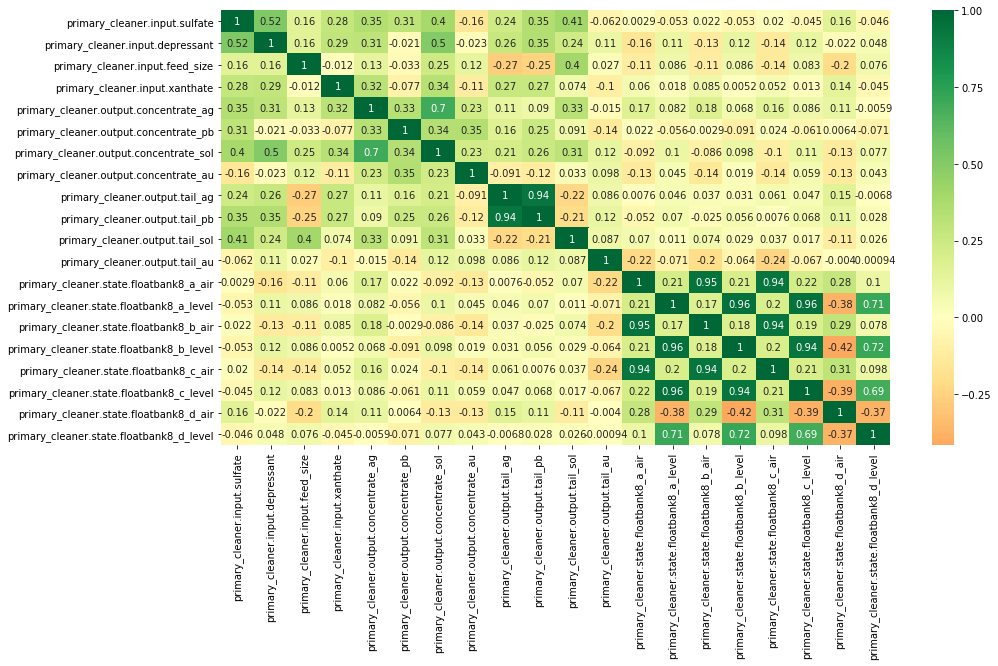

In [58]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_tmp.corr(), cmap='RdYlGn', center=0, annot=True);

Что касается признаков  
primary_cleaner.input.sulfate,   
primary_cleaner.input.depressant и   
primary_cleaner.input.xanthate,  
то они зависят от выходных параметров продукта предыдущего этапа.  

Признаки:  
primary_cleaner.output.concentrate_ag  
primary_cleaner.output.concentrate_pb  
primary_cleaner.output.concentrate_sol  
primary_cleaner.output.concentrate_au  
primary_cleaner.output.tail_ag  
primary_cleaner.output.tail_pb  
primary_cleaner.output.tail_sol  
primary_cleaner.output.tail_au  
зависят от выходных параметров продукта предыдущего этапа и всех параметров процесса очистки текущего этапа.  

Признаки:  
primary_cleaner.state.floatbank8_a_air  
primary_cleaner.state.floatbank8_b_air  
primary_cleaner.state.floatbank8_c_air  
primary_cleaner.state.floatbank8_d_air  
взаимо коррелируются, в них очень мало пропусков и их можно заменить на средние. Данное замечание касается всех признаков, у которых незначительное количество пропусков.


In [59]:
def filling_primary(df_, cols_need, name):
    print('name:', name)
    print()
    cols_for_ = [col for col in df_.columns if col.startswith('rougher.output.concentrate')]
    features_ = df_[df_[name].notna()].loc[:,cols_for_]
    target_ = df_[df_[name].notna()][name]
    test_ = df_[df_[name].isna()].loc[:,cols_for_]
    filling_empties(df_, features_, target_, test_, name)

In [60]:
cols_need = [col for col in df_train.columns if col.startswith('primary_cleaner')]

# заполнение пропусков в признаке primary_cleaner.input.sulfate
filling_primary(df_train, cols_need, 'primary_cleaner.input.sulfate')
df_tmp = df_train[cols_need]

# заполнение пропусков в признаке primary_cleaner.input.depressant
filling_primary(df_train, cols_need, 'primary_cleaner.input.depressant')
df_tmp = df_train[cols_need]

# заполнение пропусков в признаке primary_cleaner.input.xanthate
filling_primary(df_train, cols_need, 'primary_cleaner.input.xanthate')


name: primary_cleaner.input.sulfate

Заполнение поля ` primary_cleaner.input.sulfate

размер обучающей выборки: (14363, 4)
размер целевого признака: (14363,)
размер тестовой выборки: (38, 4)

in df_:
376     156.489596
1139    171.110908
4028    164.833923
4456    109.129698
5660    137.044518
Name: primary_cleaner.input.sulfate, dtype: float64
----------------------------------------
name: primary_cleaner.input.depressant

Заполнение поля ` primary_cleaner.input.depressant

размер обучающей выборки: (14350, 4)
размер целевого признака: (14350,)
размер тестовой выборки: (51, 4)

in df_:
130     8.887262
131     9.075949
132     9.018717
376    10.011527
381     4.828552
Name: primary_cleaner.input.depressant, dtype: float64
----------------------------------------
name: primary_cleaner.input.xanthate

Заполнение поля ` primary_cleaner.input.xanthate

размер обучающей выборки: (14288, 4)
размер целевого признака: (14288,)
размер тестовой выборки: (113, 4)

in df_:
1664    0.709890
2570 

In [61]:
df_tmp = df_train[cols_need]
df_tmp.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.output.concentrate_ag         0
primary_cleaner.output.concentrate_pb       138
primary_cleaner.output.concentrate_sol      376
primary_cleaner.output.concentrate_au         0
primary_cleaner.output.tail_ag                1
primary_cleaner.output.tail_pb               15
primary_cleaner.output.tail_sol              91
primary_cleaner.output.tail_au                0
primary_cleaner.state.floatbank8_a_air        3
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        3
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        1
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        2
primary_cleaner.state.floatbank8_d_level      0
dtype: int64

In [62]:
# функция заполнение пропусков средней величиной

def filling_by_mean(df_, name):
    print('Заполнение признака', name)
    print()
    empties_ = df_[df_[name].isna()][name]
    my_mean = df_train[name].mean()
    df_.loc[empties_.index, name] = my_mean
    print(df_train.loc[empties_.index, name].head())

In [63]:
# заполнение пропусков в признаке primary_cleaner.state.floatbank8_a_air
filling_by_mean(df_train, 'primary_cleaner.state.floatbank8_a_air')

# заполнение пропусков в признаке primary_cleaner.state.floatbank8_b_air
filling_by_mean(df_train, 'primary_cleaner.state.floatbank8_b_air')

# заполнение пропусков в признаке primary_cleaner.state.floatbank8_c_air
filling_by_mean(df_train, 'primary_cleaner.state.floatbank8_c_air')

# заполнение пропусков в признаке primary_cleaner.state.floatbank8_d_air
filling_by_mean(df_train, 'primary_cleaner.state.floatbank8_d_air')

# заполнение пропусков в признаке primary_cleaner.output.tail_ag
filling_by_mean(df_train, 'primary_cleaner.output.tail_ag')

Заполнение признака primary_cleaner.state.floatbank8_a_air

6934    1606.255148
7292    1606.255148
7293    1606.255148
Name: primary_cleaner.state.floatbank8_a_air, dtype: float64
Заполнение признака primary_cleaner.state.floatbank8_b_air

6934    1607.009219
7292    1607.009219
7293    1607.009219
Name: primary_cleaner.state.floatbank8_b_air, dtype: float64
Заполнение признака primary_cleaner.state.floatbank8_c_air

7612    1607.304682
Name: primary_cleaner.state.floatbank8_c_air, dtype: float64
Заполнение признака primary_cleaner.state.floatbank8_d_air

2797    1546.144433
7612    1546.144433
Name: primary_cleaner.state.floatbank8_d_air, dtype: float64
Заполнение признака primary_cleaner.output.tail_ag

4749    16.339181
Name: primary_cleaner.output.tail_ag, dtype: float64


In [64]:
features_for_train = []
for col in df_train.columns:
    if col.startswith('rougher.output.concentrate_'):
        features_for_train.append(col)
    elif col.startswith('primary_cleaner.input'):
        features_for_train.append(col)
    elif col.startswith('primary_cleaner.state'):
        features_for_train.append(col)
features_for_train        

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [65]:
def filling_primary_metall(df_, features_for_train, name):
    print()
    features_ = df_[df_[name].notna()].loc[:,features_for_train]
    target_ = df_[df_[name].notna()][name]
    test_ = df_[df_[name].isna()].loc[:,features_for_train]
    filling_empties(df_, features_, target_, test_, name)

# заполнение пропусков в признаке primary_cleaner.output.concentrate_pb
filling_primary_metall(df_train, features_for_train, 'primary_cleaner.output.concentrate_pb')
    
# заполнение пропусков в признаке primary_cleaner.output.concentrate_sol
filling_primary_metall(df_train, features_for_train, 'primary_cleaner.output.concentrate_sol')

# заполнение пропусков в признаке primary_cleaner.output.tail_pb
filling_primary_metall(df_train, features_for_train, 'primary_cleaner.output.tail_pb')

# заполнение пропусков в признаке primary_cleaner.output.tail_sol
filling_primary_metall(df_train, features_for_train, 'primary_cleaner.output.tail_sol')



Заполнение поля ` primary_cleaner.output.concentrate_pb

размер обучающей выборки: (14263, 16)
размер целевого признака: (14263,)
размер тестовой выборки: (138, 16)

in df_:
74     9.575087
130    5.900698
132    6.331768
382    7.964153
383    8.561224
Name: primary_cleaner.output.concentrate_pb, dtype: float64
----------------------------------------

Заполнение поля ` primary_cleaner.output.concentrate_sol

размер обучающей выборки: (14025, 16)
размер целевого признака: (14025,)
размер тестовой выборки: (376, 16)

in df_:
74     11.167148
130     7.178260
132     7.557953
382     8.027610
383     8.299235
Name: primary_cleaner.output.concentrate_sol, dtype: float64
----------------------------------------

Заполнение поля ` primary_cleaner.output.tail_pb

размер обучающей выборки: (14386, 16)
размер целевого признака: (14386,)
размер тестовой выборки: (15, 16)

in df_:
695     3.897925
696     4.090974
697     3.943448
698     3.913091
1219    1.302107
Name: primary_cleaner.output.

In [66]:
# обновление df_tmp
df_tmp = df_train[cols_need]
df_tmp.isna().sum()

primary_cleaner.input.sulfate               0
primary_cleaner.input.depressant            0
primary_cleaner.input.feed_size             0
primary_cleaner.input.xanthate              0
primary_cleaner.output.concentrate_ag       0
primary_cleaner.output.concentrate_pb       0
primary_cleaner.output.concentrate_sol      0
primary_cleaner.output.concentrate_au       0
primary_cleaner.output.tail_ag              0
primary_cleaner.output.tail_pb              0
primary_cleaner.output.tail_sol             0
primary_cleaner.output.tail_au              0
primary_cleaner.state.floatbank8_a_air      0
primary_cleaner.state.floatbank8_a_level    0
primary_cleaner.state.floatbank8_b_air      0
primary_cleaner.state.floatbank8_b_level    0
primary_cleaner.state.floatbank8_c_air      0
primary_cleaner.state.floatbank8_c_level    0
primary_cleaner.state.floatbank8_d_air      0
primary_cleaner.state.floatbank8_d_level    0
dtype: int64

***

**Заполнение признаков этапа вторичной очистки**

Заполнение будет аналогично первичной очистки:
- малое количество пропусков заполним средними;
- secondary_cleaner.output.tail_sol - зависит от параметров металлов в предыдущем этапе и всех параметров очистки.

In [67]:
cols_need = [col for col in df_train.columns if col.startswith('secondary_cleaner')]
df_tmp = df_train[cols_need]
df_tmp.isna().sum()

secondary_cleaner.output.tail_ag                 2
secondary_cleaner.output.tail_pb                14
secondary_cleaner.output.tail_sol             1723
secondary_cleaner.output.tail_au                 0
secondary_cleaner.state.floatbank2_a_air       225
secondary_cleaner.state.floatbank2_a_level       0
secondary_cleaner.state.floatbank2_b_air        23
secondary_cleaner.state.floatbank2_b_level       0
secondary_cleaner.state.floatbank3_a_air         6
secondary_cleaner.state.floatbank3_a_level       0
secondary_cleaner.state.floatbank3_b_air         0
secondary_cleaner.state.floatbank3_b_level       0
secondary_cleaner.state.floatbank4_a_air         6
secondary_cleaner.state.floatbank4_a_level       0
secondary_cleaner.state.floatbank4_b_air         0
secondary_cleaner.state.floatbank4_b_level       0
secondary_cleaner.state.floatbank5_a_air         0
secondary_cleaner.state.floatbank5_a_level       0
secondary_cleaner.state.floatbank5_b_air         0
secondary_cleaner.state.floatba

In [68]:
# заполнение пропусков в признаке secondary_cleaner.state.floatbank6_a_air
filling_by_mean(df_train, 'secondary_cleaner.state.floatbank6_a_air')

# заполнение пропусков в признаке secondary_cleaner.state.floatbank4_a_air
filling_by_mean(df_train, 'secondary_cleaner.state.floatbank4_a_air')

# заполнение пропусков в признаке secondary_cleaner.state.floatbank3_a_air
filling_by_mean(df_train, 'secondary_cleaner.state.floatbank3_a_air')

# заполнение пропусков в признаке secondary_cleaner.state.floatbank2_b_air
filling_by_mean(df_train, 'secondary_cleaner.state.floatbank2_b_air')

# заполнение пропусков в признаке secondary_cleaner.state.floatbank2_a_air
filling_by_mean(df_train, 'secondary_cleaner.state.floatbank2_a_air')

# заполнение пропусков в признаке secondary_cleaner.output.tail_ag
filling_by_mean(df_train, 'secondary_cleaner.output.tail_ag')

# заполнение пропусков в признаке secondary_cleaner.output.tail_pb
filling_by_mean(df_train, 'secondary_cleaner.output.tail_pb')


Заполнение признака secondary_cleaner.state.floatbank6_a_air

10416    19.549296
16137    19.549296
Name: secondary_cleaner.state.floatbank6_a_air, dtype: float64
Заполнение признака secondary_cleaner.state.floatbank4_a_air

10445    19.938443
10448    19.938443
10449    19.938443
10450    19.938443
10451    19.938443
Name: secondary_cleaner.state.floatbank4_a_air, dtype: float64
Заполнение признака secondary_cleaner.state.floatbank3_a_air

751    29.249409
752    29.249409
753    29.249409
754    29.249409
755    29.249409
Name: secondary_cleaner.state.floatbank3_a_air, dtype: float64
Заполнение признака secondary_cleaner.state.floatbank2_b_air

751    24.951767
752    24.951767
753    24.951767
754    24.951767
755    24.951767
Name: secondary_cleaner.state.floatbank2_b_air, dtype: float64
Заполнение признака secondary_cleaner.state.floatbank2_a_air

6927    29.613593
6928    29.613593
6929    29.613593
6930    29.613593
6931    29.613593
Name: secondary_cleaner.state.floatbank2_a_ai

In [69]:
features_for_train = []
for col in df_train.columns:
    if col.startswith('primary_cleaner.output.concentrate_'):
        features_for_train.append(col)
    elif col.startswith('secondary_cleaner.state'):
        features_for_train.append(col)
features_for_train        

['primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_cleaner.state.floatbank5_b_level',
 'secondary_cleaner.state.floatbank6_a_air',
 'secondary_cleaner.state.floatbank6_a_level']

In [70]:
features_ = df_train[df_train['secondary_cleaner.output.tail_sol'].notna()].loc[:,features_for_train]
target_ = df_train[df_train['secondary_cleaner.output.tail_sol'].notna()]['secondary_cleaner.output.tail_sol']
test_ = df_train[df_train['secondary_cleaner.output.tail_sol'].isna()].loc[:,features_for_train]
filling_empties(df_train, features_, target_, test_, 'secondary_cleaner.output.tail_sol')

Заполнение поля ` secondary_cleaner.output.tail_sol

размер обучающей выборки: (12678, 22)
размер целевого признака: (12678,)
размер тестовой выборки: (1723, 22)

in df_:
130     6.734185
131    10.071699
132     7.687191
133    11.496123
134    10.767019
Name: secondary_cleaner.output.tail_sol, dtype: float64
----------------------------------------


Теперь заполним соответствующие пропуски в тестовой выборке.  
Поскольку там мало пропуско, то будет достаточно заполнить средними значениями.

In [71]:
df_test.isna().sum()[df_test.isna().sum() > 0]

primary_cleaner.input.sulfate               14
primary_cleaner.input.depressant            17
primary_cleaner.input.xanthate              14
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     5
secondary_cleaner.state.floatbank3_a_air    13
dtype: int64

In [72]:
fields_for_filling = [
    'primary_cleaner.input.sulfate',
    'primary_cleaner.input.depressant', 
    'primary_cleaner.input.xanthate', 
    'secondary_cleaner.state.floatbank2_a_air', 
    'secondary_cleaner.state.floatbank2_b_air',
    'secondary_cleaner.state.floatbank3_a_air'  
]
for field in fields_for_filling:
    filling_by_mean(df_test, field)
df_test[fields_for_filling].isna().sum()

Заполнение признака primary_cleaner.input.sulfate

30      145.952867
264     235.596461
327     177.255821
372            NaN
1480     98.734508
Name: primary_cleaner.input.sulfate, dtype: float64
Заполнение признака primary_cleaner.input.depressant

30     13.947704
264    16.003029
327    18.103563
684    12.383053
685    13.015571
Name: primary_cleaner.input.depressant, dtype: float64
Заполнение признака primary_cleaner.input.xanthate

30      0.991678
264     1.400281
684     1.558726
705     1.558282
3452         NaN
Name: primary_cleaner.input.xanthate, dtype: float64
Заполнение признака secondary_cleaner.state.floatbank2_a_air

5240    25.120135
5241    25.065373
5242    25.000333
Name: secondary_cleaner.state.floatbank2_a_air, dtype: float64
Заполнение признака secondary_cleaner.state.floatbank2_b_air

3087          NaN
3088          NaN
3931    15.972043
3932    15.955226
3933    15.966476
Name: secondary_cleaner.state.floatbank2_b_air, dtype: float64
Заполнение признака seco

primary_cleaner.input.sulfate               0
primary_cleaner.input.depressant            0
primary_cleaner.input.xanthate              0
secondary_cleaner.state.floatbank2_a_air    0
secondary_cleaner.state.floatbank2_b_air    0
secondary_cleaner.state.floatbank3_a_air    0
dtype: int64

***

# 2. Анализ данных

**Проанализируйте данные**  
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.  
2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.  
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

Данные о концентрате металлов существуют для каждого этапа, за исключением `secondary_cleaner` (вторичнай очистки), но будем полагать, что они совпадают с данными финального этапа.  

Сформируем таблицы `concentrate_ag, concentrate_pb и concentrate_au` и рассмотрим изменение статистических показателей долей этих металлов в концентрате.

In [74]:
concentrates_name = ['concentrate_ag', 'concentrate_pb', 'concentrate_au']
columns = ['final', 'prim_cleaner', 'rougher']
columns_sort = ['rougher', 'prim_cleaner', 'final']
df_concentrates = []
for name in concentrates_name:
    table = df_train.loc[:, [col for col in df_train.columns if col.endswith(name)]]
    table.columns = columns
    table = table.loc[:, columns_sort]
    df_concentrates.append(table)
#     print(table.head())


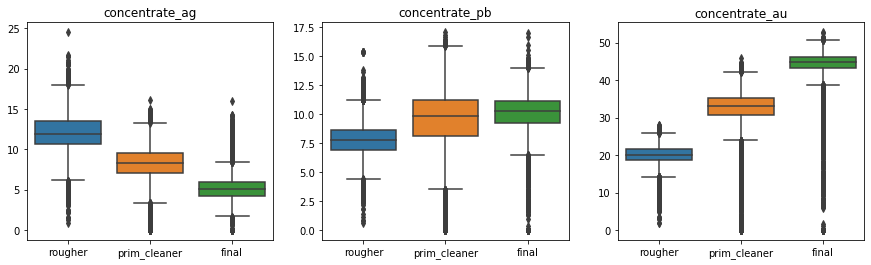

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    ax[i].set_title(concentrates_name[i])
    sns.boxplot(data=df_concentrates[i], ax=ax[i])


Как видно из диаграмм, доля золота в концентрате от первоначального этапа к финальному этапу возрастает. Это и не удивительно, весь процесс очистки направлен на то, чтобы это так и было.  
Что касается других металлов, то доля свинца хоть и немного, но повысилась, а доля серебра значительно сократилась.  
Пока объяснений нет. Может быть много серебра оказалась в отвалах? Рассмотрим диаграммы с отвалами.

In [76]:
tails_name = ['tail_ag', 'tail_pb', 'tail_au']
columns = ['final', 'prim_cleaner', 'rougher', 'sec_cleaner']
columns_sort = ['rougher', 'prim_cleaner', 'sec_cleaner', 'final']

df_tails = []
for name in tails_name:
    table = df_train.loc[:, [col for col in df_train.columns if col.find(name) >= 0]]
    table.columns = columns
    table = table.loc[:, columns_sort]
    df_tails.append(table)

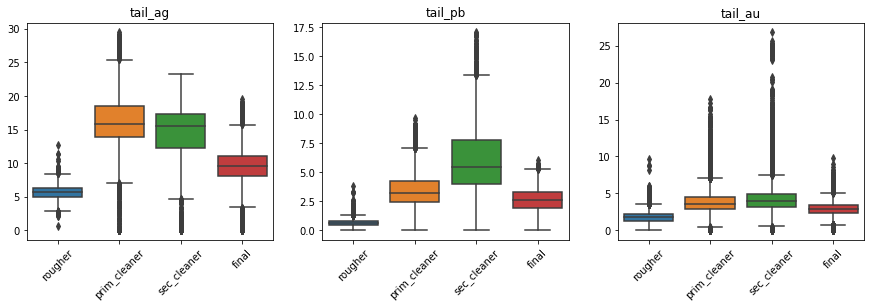

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    ax[i].set_title(tails_name[i])
    ax[i].xaxis.set_tick_params(rotation=45)
    sns.boxplot(data=df_tails[i], ax=ax[i])

Итак: Доля серебра в концентратах значительно сокращается из-за того, что его очень много уходит в отвалы. В то время, как по другим металлам их доля в отвалах меняется незначительно.

***

#### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [78]:
df_train_size = df_train.loc[:, ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
df_train_size.columns = ['train_rougher', 'train_primary_cleaner']
df_train_size.dropna(inplace=True)
df_test_size = df_test.loc[:, ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
df_test_size.columns = ['test_rougher', 'test_primary_cleaner']
df_test_size.dropna(inplace=True)

print('Тренировочная выборка:')
print(df_train_size.info())
print('-'*40)
print('Обучающая выборка:')
print(df_test_size.info())

Тренировочная выборка:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14401 entries, 0 to 16859
Data columns (total 2 columns):
train_rougher            14401 non-null float64
train_primary_cleaner    14401 non-null float64
dtypes: float64(2)
memory usage: 337.5 KB
None
----------------------------------------
Обучающая выборка:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5471 entries, 0 to 5855
Data columns (total 2 columns):
test_rougher            5471 non-null float64
test_primary_cleaner    5471 non-null float64
dtypes: float64(2)
memory usage: 128.2 KB
None


In [79]:
df_train_size.describe().join(df_test_size.describe())

,train_rougher,train_primary_cleaner,test_rougher,test_primary_cleaner
count,14401.000000,14401.000000,5471.000000,5471.000000
mean,59.920665,7.313508,56.498213,7.263260
std,22.690854,0.618644,22.579604,0.615421
min,9.659576,1.080000,0.046369,5.650000
25%,48.928759,6.940000,43.882396,6.890000
50%,55.277522,7.290000,51.012240,7.250000
75%,65.762724,7.690000,62.587821,7.600000
max,484.967466,10.470000,477.445473,15.500000


In [80]:
# промежуточная таблица для удобства отображения диаграммы
df_sizes = df_train_size.copy()
df_sizes.columns = ['rougher', 'primary_cleaner']
df_sizes['type'] = 'train'
df_sizes2 = df_test_size.copy()
df_sizes2.columns = ['rougher', 'primary_cleaner']
df_sizes2['type'] = 'test'
df_sizes = pd.concat([df_sizes, df_sizes2])

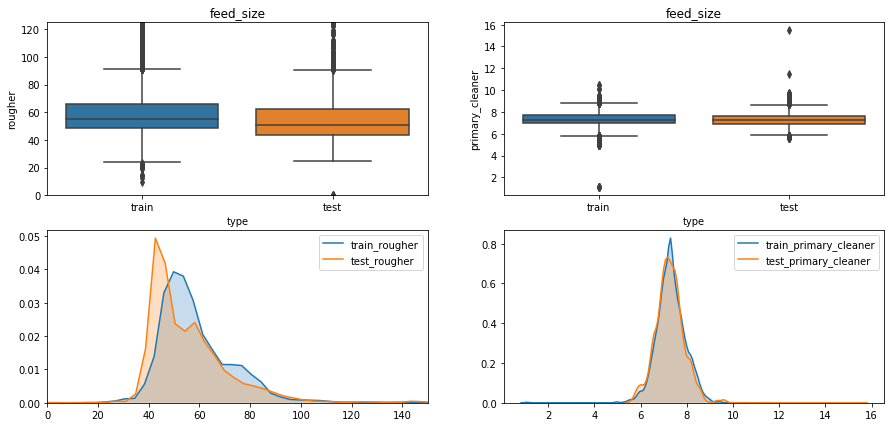

In [81]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax[0, 0].set_title('feed_size')
ax[0, 0].set_ylim(0,125)
sns.boxplot(x='type', y="rougher", data=df_sizes, ax=ax[0, 0])

ax[0, 1].set_title('feed_size')
sns.boxplot(x='type', y="primary_cleaner", data=df_sizes, ax=ax[0, 1])

ax[1, 0].set_xlim(0,150)
sns.kdeplot(df_train_size['train_rougher'], ax=ax[1, 0], shade=True)
sns.kdeplot(df_test_size['test_rougher'], ax=ax[1, 0], shade=True)

sns.kdeplot(df_train_size['train_primary_cleaner'], ax=ax[1, 1], shade=True);
sns.kdeplot(df_test_size['test_primary_cleaner'], ax=ax[1, 1], shade=True);

Как показывают статистические данные, средние значения признаков `rougher.input.feed_size` в тренировочных и тестовых данных, а также стандартное отклонение - почти совпадают. А для признака `primary_cleaner.input.feed_size` - они вообще почти один-в-один.  
Диаграммы также показывают похожие очертания распределения значений.  
Следовательно, мы можем доверять оценкам моделей.
***

#### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

Информация о концентрации веществ на разных стадиях описывается в признаках:  
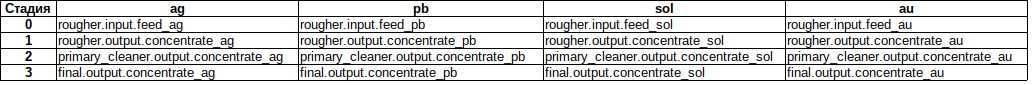

В п.2.1. мы уже видели диаграммы по концентрации металлов. И да - там есть аномалии. К ним добавилась концентрация солей.  

Сформируем таблицу df_concentrates.

In [82]:
columns_2 = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au', 
             'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 
             'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
             'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 
             'primary_cleaner.output.concentrate_au', 'final.output.concentrate_ag', 
             'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

In [83]:
df_concentrates = df_train.loc[:, columns_2]
df_concentrates.isna().sum()

rougher.input.feed_ag                       0
rougher.input.feed_pb                       0
rougher.input.feed_sol                      0
rougher.input.feed_au                       0
rougher.output.concentrate_ag               0
rougher.output.concentrate_pb               0
rougher.output.concentrate_sol              0
rougher.output.concentrate_au               0
primary_cleaner.output.concentrate_ag       0
primary_cleaner.output.concentrate_pb       0
primary_cleaner.output.concentrate_sol      0
primary_cleaner.output.concentrate_au       0
final.output.concentrate_ag                 1
final.output.concentrate_pb                 1
final.output.concentrate_sol              260
final.output.concentrate_au                 0
dtype: int64

In [84]:
df_concentrates.describe()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au
count,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14401.000000,14400.000000,14400.000000,14141.000000,14401.000000
mean,8.641734,3.533306,36.083971,7.926530,12.083629,7.850740,28.988884,19.900509,8.203784,9.480231,9.992297,32.219350,5.204998,10.109191,9.227354,43.789677
std,1.939315,1.111149,5.137651,1.972363,2.165547,1.497972,4.578658,2.506924,2.075572,2.752120,4.100301,6.027163,1.480192,1.700676,2.833022,5.267025
min,1.226494,0.088552,0.463867,0.588152,0.905993,0.629964,-0.143891,1.889855,0.000000,0.000000,-1.921899,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.142838,2.774108,33.795349,6.603091,10.590830,6.939760,26.941041,18.574836,7.090005,8.148873,7.343353,30.716630,4.224198,9.285950,7.469086,43.128301
50%,8.208920,3.430663,36.851204,7.680501,11.858137,7.809500,29.427709,20.045231,8.243898,9.850087,9.645852,33.115839,5.026107,10.285373,8.878181,44.808605
75%,10.005098,4.269981,39.362058,9.186292,13.552272,8.645908,31.940299,21.510094,9.556494,11.248715,12.987036,35.276940,5.916652,11.171402,10.565044,46.121155
max,14.869652,7.142594,48.363177,14.093363,24.480271,15.389648,40.089993,28.146838,16.081632,17.081278,22.280845,45.933934,16.001945,17.031899,18.124851,52.756638


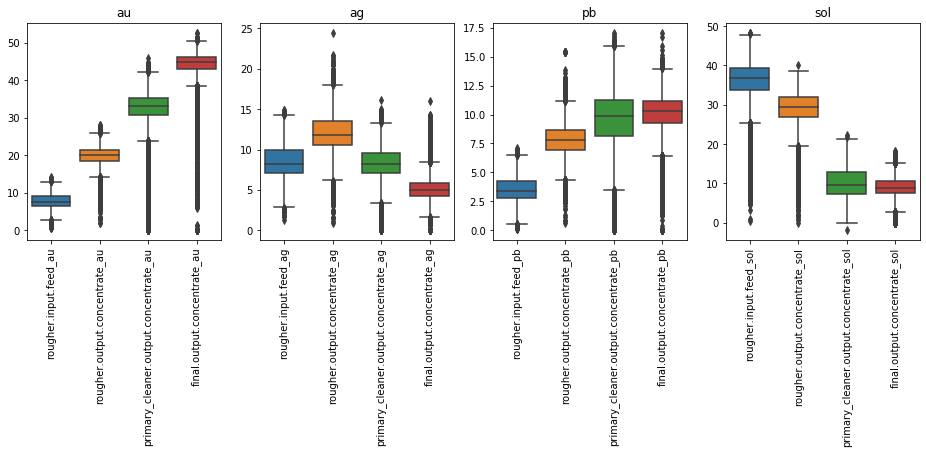

In [85]:
metall = ['au', 'ag', 'pb', 'sol']

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    ax[i].set_title(metall[i])
    ax[i].xaxis.set_tick_params(rotation=90)
    sns.boxplot(data=df_concentrates.loc[:, [col for col in df_concentrates.columns if col.find(metall[i]) > -1]], 
                ax=ax[i])


Видно, что для любого вещества в концентрате существуют аномальные значения. Но нам, прежде всего, не интересны те наблюдения, в которых доля золота на любом этапе незначительна.  

Ранее мы уже исключили те налюдения, у которых rougher.input.feed_au менее 0,1.  
Давайте рассмотрим ситуации с долей золота на других этапах очестки.  
Прежде всего рассмотрим финальную часть. При средних значении 43 и стандартном отклонении 7 единиц, нам уже не интересны значения менее 30 единиц. Но порог мы возьмем с запасом - 20 единиц.  
Удалим такие наблюдения и вновь посмотрим на диаграммы.

In [86]:
df_concentrates[df_concentrates['final.output.concentrate_au'] < 20].shape

(165, 16)

In [87]:
df_concentrates2 = df_concentrates[df_concentrates['final.output.concentrate_au'] >= 20]

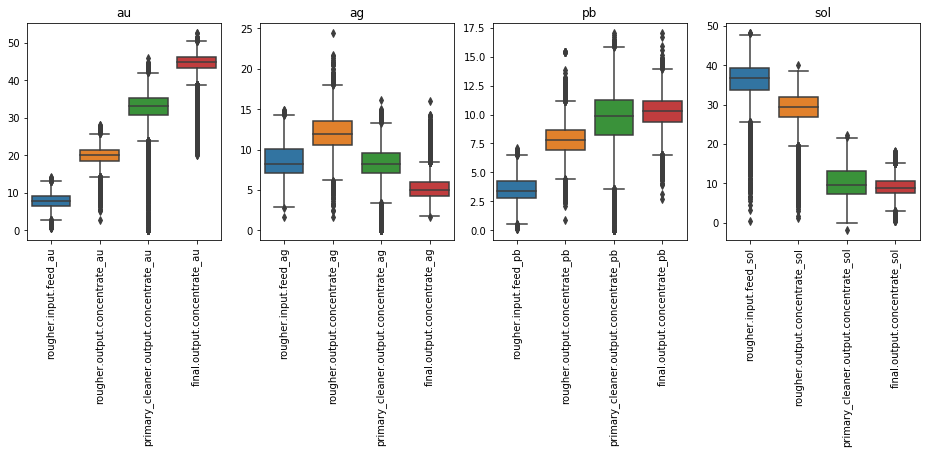

In [88]:
metall = ['au', 'ag', 'pb', 'sol']

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    ax[i].set_title(metall[i])
    ax[i].xaxis.set_tick_params(rotation=90)
    sns.boxplot(data=df_concentrates2.loc[:, [col for col in df_concentrates2.columns if col.find(metall[i]) > -1]], 
                ax=ax[i])

Изменения оказались минимальными, и то это, в основном, касалось признака final.output.concentrate_au.  
О чем это может сказать?  
О том, что большинство значения final.output.concentrate_au, которые менее 20 единиц, оказались такими не за счет низких значений концентраций золота в предыдущих этапах, а за счет не корректного предоставления данных этого признака. (Это справелоиво для каждого из представленных веществ)  
По идее, как мы видим из диаграммы по золоту - всегда должно быть справедливо соотношение:
$$rougher.input.feed__au <= rougher.output.concentrate__au <= primary_cleaner.output.concentrate__au <= final.output.concentrate__au$$

Если на каком-то этапе это не так, то это значение нужно заменять на какое-то среднее значение между значениями предыдущего этапа и следующего. А значения этапа final можно найти по линейной регрессии.  

Но, поскольку это долгий и трудоемкий процесс, то для наших целей будет достаточно просто удалить наблюдения у которых:
- final.output.concentrate_au < 20
- primary_cleaner.output.concentrate_au < 15
- rougher.output.concentrate_au < 10
- rougher.input.feed_au < 2

In [89]:
df_concentrates2 = df_concentrates2[df_concentrates2['primary_cleaner.output.concentrate_au'] >= 15]
df_concentrates2 = df_concentrates2[df_concentrates2['rougher.output.concentrate_au'] >= 10]
df_concentrates2 = df_concentrates2[df_concentrates2['rougher.input.feed_au'] >= 2]

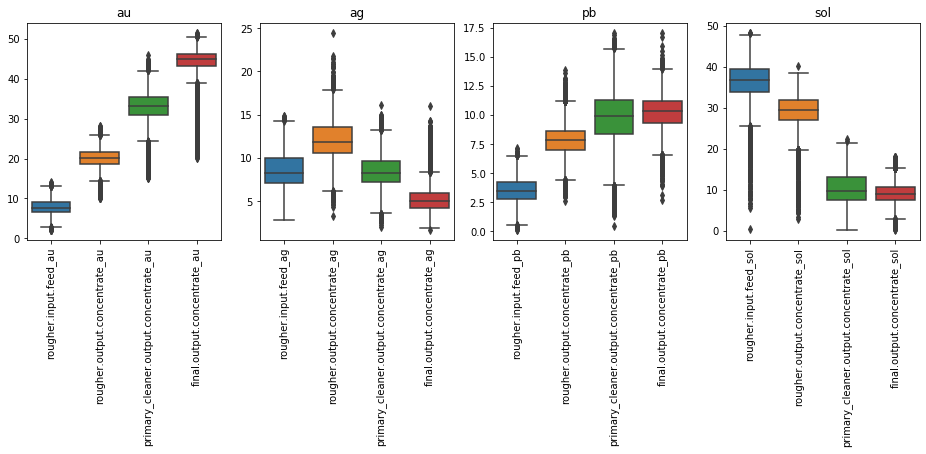

In [90]:
metall = ['au', 'ag', 'pb', 'sol']

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    ax[i].set_title(metall[i])
    ax[i].xaxis.set_tick_params(rotation=90)
    sns.boxplot(data=df_concentrates2.loc[:, [col for col in df_concentrates2.columns if col.find(metall[i]) > -1]], 
                ax=ax[i])

Таким образом, мы не только избавились от экстремально низких аномалий доли золота, но попутно уменьшили низкие аномалии и по другим веществам.  
На этом, я думаю, можно остановиться.
***

# 3. Модель

**Постройте модель**  
3.1. Напишите функцию для вычисления итоговой sMAPE.  
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [91]:
# sMAPE = (1/N) * SUM((|yi-y^i| / (|yi|+|y^i|)/2) * 100%)
def smape(target_valid, target_predict):
    n = len(target_valid)
    summ_ = 0
    tmp = pd
    for i in range(n):
        a = abs(target_valid[i] - target_predict[i])
        b = (abs(target_valid[i]) + abs(target_predict[i])) / 2
        summ_ += a / b
    return summ_ * 100 / n
    
def ending_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape

In [92]:
#df_test.columns

In [93]:
columns_for_rougher_recovery = [col for col in df_test.columns if col.startswith('rougher')]
columns_for_final_recovery = df_test.columns[1:]

features_for_rougher = df_train[columns_for_rougher_recovery]
target_for_rougher = df_train['rougher.calculation.recovery']

features_for_final = df_train[columns_for_final_recovery]
target_for_final = df_train['final.calculation.recovery']


In [94]:

def get_score(features_, target_, model=None, n_blocks=3):
    scores = []

    # зададим размер блока
    block_size = int(len(features_)/n_blocks)

    for i in range(0, len(features_), block_size):
        valid_indexes = features_.index[i:i+block_size]
        train_indexes = [k for k in features_.index if k not in valid_indexes]

        # разбейте переменные features и target на выборки features_train, target_train, features_valid, target_valid
        features_train = features_.loc[[x for x in train_indexes]]
        target_train = target_.loc[[x for x in train_indexes]]
        features_valid = features_.loc[[x for x in valid_indexes]]
        target_valid = target_.loc[[x for x in valid_indexes]]

        if model is None:
            model = LinearRegression()
        model.fit(features_train, target_train)

        valid_prediction = model.predict(features_valid)
        score = smape(target_valid.values, valid_prediction)
        scores.append(score)

    scores = pd.Series(scores)
    return scores.mean()


In [95]:
# LinearRegression
modeles = {
    'name': [],
    'block_cv': [],
    'sMAPE': []
}

for i in 3, 4, 5, 6:
    modeles['name'].append('LinearRegression')
    modeles['block_cv'].append(i)

    rougher_smape = get_score(features_for_rougher, target_for_rougher, n_blocks=i)

    final_smape = get_score(features_for_final, target_for_final, n_blocks=i)
    end_smape = ending_smape(rougher_smape, final_smape)
    modeles['sMAPE'].append(end_smape)   


In [96]:
%%time

# RandomForestRegressor
for depth in 2,3,4:
    for n_estimators in range(3, 20, 3):
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=12345)

        for i in 3, 4, 5:
            modeles['name'].append('RFR_estim{}_depth{}'.format(n_estimators, depth))
            modeles['block_cv'].append(i)

            rougher_smape = get_score(features_for_rougher, target_for_rougher, model, n_blocks=i)

            final_smape = get_score(features_for_final, target_for_final, model, n_blocks=i)
            end_smape = ending_smape(rougher_smape, final_smape)
            modeles['sMAPE'].append(end_smape)


CPU times: user 9min 29s, sys: 0 ns, total: 9min 29s
Wall time: 9min 39s


In [97]:
df_modeles = pd.DataFrame(modeles)
best_model = df_modeles[df_modeles['sMAPE'] == df_modeles['sMAPE'].max()]
print('Лучшая модель:')
print(best_model)
df_modeles.describe()

Лучшая модель:
               name  block_cv      sMAPE
0  LinearRegression         3  10.449719


,block_cv,sMAPE
count,58.000000,58.000000
mean,4.034483,9.207967
std,0.857690,0.494985
min,3.000000,8.317508
25%,3.000000,8.852149
50%,4.000000,9.139010
75%,5.000000,9.644130
max,6.000000,10.449719


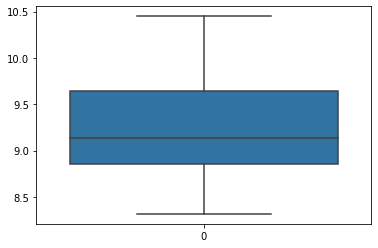

In [98]:
sns.boxplot(data=df_modeles['sMAPE']);

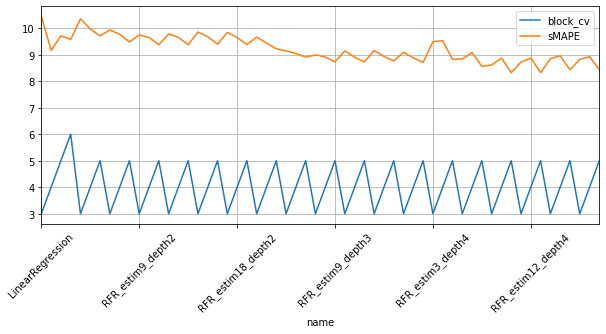

In [99]:
df_modeles.plot(x='name', grid=True, figsize=(10, 4), rot=45);

Мы провели расчет для моделей линейной регрессии и регрессии случайного леса с различными параметрами: количества блоков кросс-валидации, глубины дерева и числа деревьев.

Наилучшей моделью оказалась модель линейной регрессии с количеством блоков кросс-валидации равным 3.

Далее применим ее на тестовой выборке.

In [100]:
def get_ending(features_, target_, test_):
    i = 3
    block_size = int(len(data)/3)

    valid_indexes = df_train.index[:block_size]
    train_indexes = df_train.index[block_size:]

    features_train = features_.loc[[x for x in train_indexes]]
    target_train = target_.loc[[x for x in train_indexes]]
    features_valid = features_.loc[[x for x in valid_indexes]]
    target_valid = target_.loc[[x for x in valid_indexes]]

    model = LinearRegression()
    model.fit(features_train, target_train)

    test_prediction = model.predict(test_)
    test_prediction = pd.DataFrame(test_prediction, index=test_.index)
    return test_prediction
    
print('Модель: LinearRegression')
print('Количество кросс-валидаций: 3')

test_recovery = df_test[columns_for_rougher_recovery]
test_finalrecovery = df_test[columns_for_final_recovery]

prediction_recovery = get_ending(features_for_rougher, target_for_rougher, test_recovery)
prediction_finalrecovery = get_ending(features_for_final, target_for_final, test_finalrecovery)

prediction = prediction_recovery.join(prediction_finalrecovery, rsuffix='_final')
prediction.columns = ['rougher.output.recovery', 'final.output.recovery']
prediction.head()

Модель: LinearRegression
Количество кросс-валидаций: 3


,rougher.output.recovery,final.output.recovery
0,93.238751,71.959333
1,92.439376,72.786703
2,92.708054,73.098057
3,91.506831,73.254771
4,89.962918,71.530526


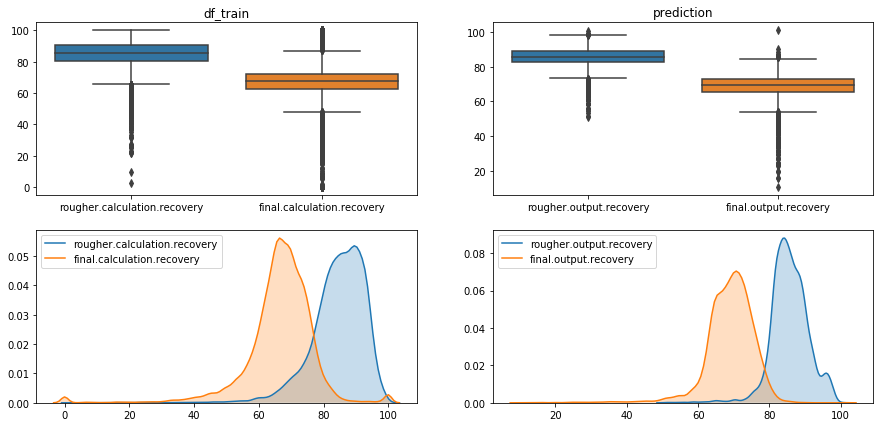

In [101]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax[0, 0].set_title('df_train')
# ax[0, 0].set_ylim(0,125)
sns.boxplot(data=df_train.loc[:,['rougher.calculation.recovery', 'final.calculation.recovery']], ax=ax[0, 0])

ax[0, 1].set_title('prediction')
sns.boxplot(data=prediction, ax=ax[0, 1])

# ax[1, 0].set_xlim(0,150)
sns.kdeplot(df_train['rougher.calculation.recovery'], ax=ax[1, 0], shade=True)
sns.kdeplot(df_train['final.calculation.recovery'], ax=ax[1, 0], shade=True)

sns.kdeplot(prediction['rougher.output.recovery'], ax=ax[1, 1], shade=True);
sns.kdeplot(prediction['final.output.recovery'], ax=ax[1, 1], shade=True);

In [102]:
# для вычисления заключительного итогового sMAPE с участием предсказанных значений
# возьмем соответствующие выборки из df_train
prediction_len = len(prediction)
target_cols = ['rougher.calculation.recovery', 'final.calculation.recovery']
df_sample = df_train.sample(n=prediction_len, random_state=1).loc[:, target_cols]

rougher_smape = smape(df_sample['rougher.calculation.recovery'].values, prediction['rougher.output.recovery'].values)
final_smape = smape(df_sample['final.calculation.recovery'].values, prediction['final.output.recovery'].values)
end_smape = ending_smape(rougher_smape, final_smape)
end_smape

12.77537196513056

### Вывод.

Работа была проведена в соответствии с заданием и инструкцией к заданию.  

Были заполнены пропуски всех необходимых признаков для вычисления и прогнозирования `rougher.output.recovery` и `final.output.recovery` как в обучающей, так и тестовой выборках. Были удалены наблющения с аномальными значениями.  

Затем были проведены расчеты моделей линейной регрессии и регрессии случайного дерева с различными параметрами: количеством блоков при кросс-валидации, глубин деревьев и количеством деревьев.  

В результате расчетов была выявлена лучшая модель по значению метрики sMAPE. Ею оказалась модель линейной регресии с количеством блоков при кросс-валидации равным 3, по которой и вычислили предсказанные значения наших целевых признаков.  

И в заключение была расчитана метрика `Итоговое sMAPE` по предсказанным данным и целевых признаков случайной выборки из df_train, которая оказалась даже лучше, чем у расчитанной модели. 